# 🧠 Universal Approximation Theorem - Hiểu Trực Quan

## Tại sao Neural Network có thể mô phỏng MỌI hàm số?

**Định lý Universal Approximation** phát biểu rằng:
> *Một neural network với một hidden layer đủ rộng (đủ nhiều neuron) có thể xấp xỉ BẤT KỲ hàm liên tục nào với độ chính xác tùy ý.*

### 🎯 Ý tưởng cốt lõi:
- Mỗi neuron với activation function (ReLU, Sigmoid,...) tạo ra một **"đường gấp khúc"** hoặc **"đường cong"**
- Nhiều neuron kết hợp lại tạo thành **nhiều đoạn gấp khúc**
- Đủ nhiều đoạn gấp khúc → có thể vẽ được BẤT KỲ hình dạng nào!

### 📊 Notebook này sẽ minh họa:
1. **Một neuron đơn lẻ** tạo ra gì?
2. **Hai neuron** kết hợp thành "bump" (đỉnh nhô lên)
3. **Nhiều bumps** xấp xỉ hàm bậc thang
4. **Xấp xỉ sin(x)** với số neuron tăng dần
5. **Demo tương tác** để bạn tự khám phá!

## 1. Import Required Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho đẹp
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


---
## 2. 🔸 Một Neuron Đơn Lẻ - "Điểm Gấp Khúc" Đầu Tiên

### Công thức của 1 neuron:
$$f(x) = \text{activation}(w \cdot x + b)$$

Trong đó:
- $w$ = weight (trọng số) - điều khiển **độ dốc**
- $b$ = bias (độ lệch) - điều khiển **vị trí điểm gấp**
- activation = hàm kích hoạt (ReLU, Sigmoid, ...)

### 🎯 ReLU là activation phổ biến nhất:
$$\text{ReLU}(z) = \max(0, z)$$

**Ý nghĩa**: ReLU = 0 khi input âm, = input khi input dương → tạo ra **MỘT điểm gấp khúc**!

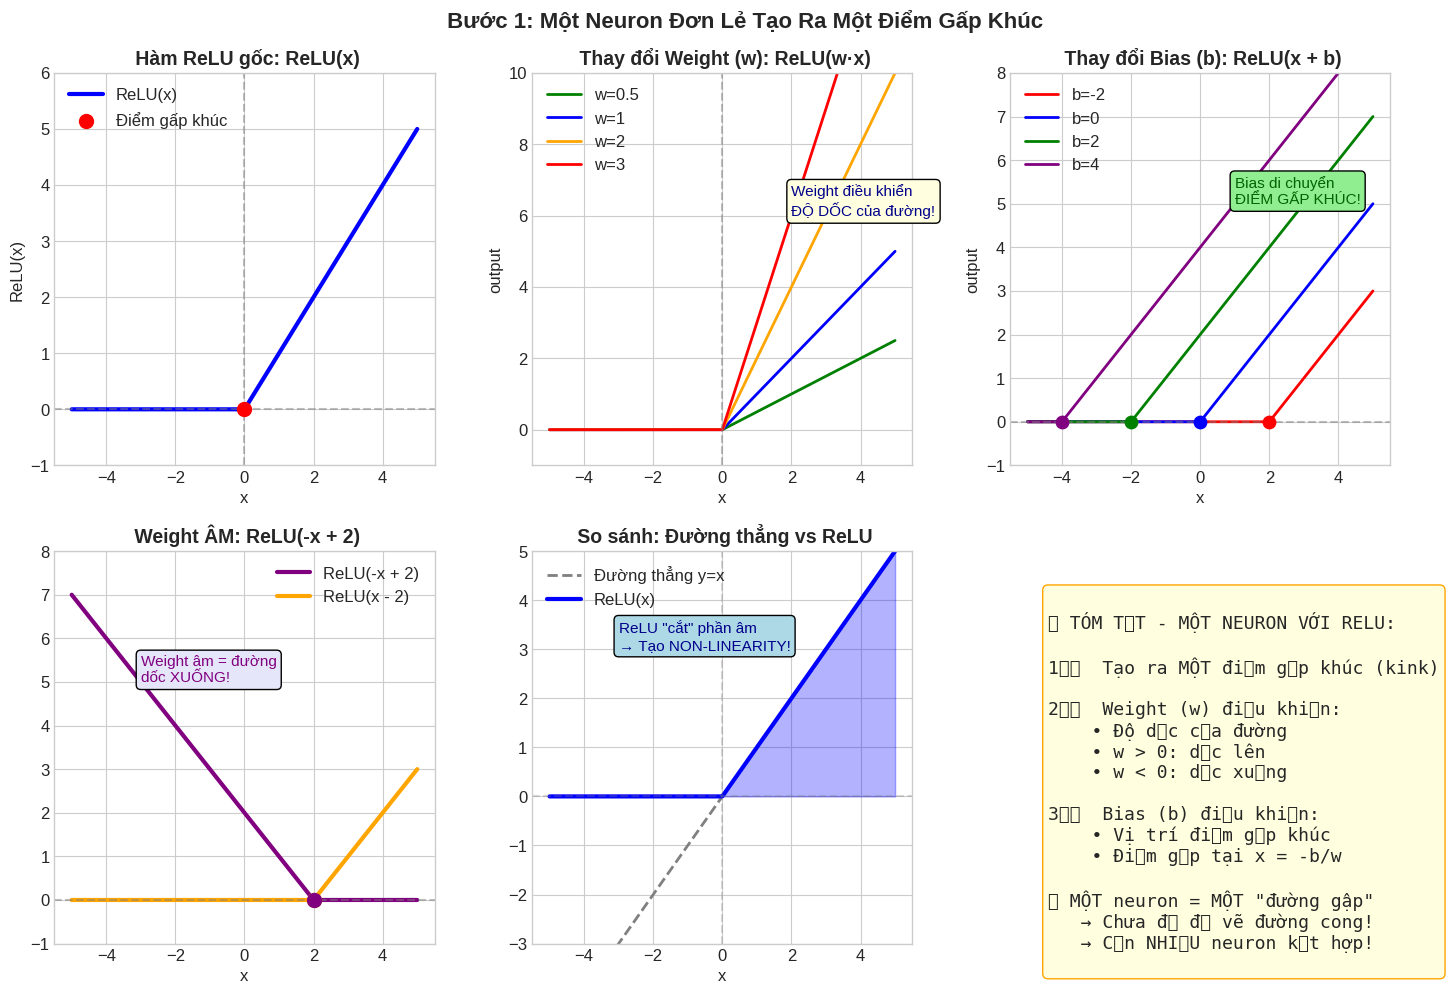

In [16]:
# ============================================
# MINH HỌA 1: Một neuron với ReLU tạo ra gì?
# ============================================

def relu(x):
    """Hàm ReLU: max(0, x)"""
    return np.maximum(0, x)

def single_neuron(x, w, b):
    """
    Một neuron đơn lẻ: ReLU(w*x + b)
    - w: weight - điều khiển độ dốc
    - b: bias - điều khiển vị trí điểm gấp
    """
    return relu(w * x + b)

# Tạo dữ liệu
x = np.linspace(-5, 5, 1000)

# Tạo figure với nhiều subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# ===== Row 1: Thay đổi Weight (w) =====
axes[0, 0].set_title(" Hàm ReLU gốc: ReLU(x)", fontsize=14, fontweight='bold')
axes[0, 0].plot(x, relu(x), 'b-', linewidth=3, label='ReLU(x)')
axes[0, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 0].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 0].scatter([0], [0], color='red', s=100, zorder=5, label='Điểm gấp khúc')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('ReLU(x)')
axes[0, 0].legend()
axes[0, 0].set_ylim(-1, 6)

# Thay đổi w (weight)
axes[0, 1].set_title(" Thay đổi Weight (w): ReLU(w·x)", fontsize=14, fontweight='bold')
for w, color in zip([0.5, 1, 2, 3], ['green', 'blue', 'orange', 'red']):
    axes[0, 1].plot(x, relu(w * x), color=color, linewidth=2, label=f'w={w}')
axes[0, 1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('output')
axes[0, 1].legend()
axes[0, 1].set_ylim(-1, 10)
axes[0, 1].annotate('Weight điều khiển\nĐỘ DỐC của đường!', 
                    xy=(2, 6), fontsize=11, color='darkblue',
                    bbox=dict(boxstyle='round', facecolor='lightyellow'))

# Thay đổi b (bias)
axes[0, 2].set_title(" Thay đổi Bias (b): ReLU(x + b)", fontsize=14, fontweight='bold')
for b, color in zip([-2, 0, 2, 4], ['red', 'blue', 'green', 'purple']):
    y = relu(x + b)
    axes[0, 2].plot(x, y, color=color, linewidth=2, label=f'b={b}')
    # Đánh dấu điểm gấp khúc (tại x = -b)
    axes[0, 2].scatter([-b], [0], color=color, s=80, zorder=5)
axes[0, 2].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 2].set_xlabel('x')
axes[0, 2].set_ylabel('output')
axes[0, 2].legend()
axes[0, 2].set_ylim(-1, 8)
axes[0, 2].annotate('Bias di chuyển\nĐIỂM GẤP KHÚC!', 
                    xy=(1, 5), fontsize=11, color='darkgreen',
                    bbox=dict(boxstyle='round', facecolor='lightgreen'))

# ===== Row 2: Kết hợp w và b =====
axes[1, 0].set_title(" Weight ÂM: ReLU(-x + 2)", fontsize=14, fontweight='bold')
axes[1, 0].plot(x, relu(-x + 2), 'purple', linewidth=3, label='ReLU(-x + 2)')
axes[1, 0].plot(x, relu(x - 2), 'orange', linewidth=3, label='ReLU(x - 2)')
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].scatter([2], [0], color='orange', s=100, zorder=5)
axes[1, 0].scatter([2], [0], color='purple', s=100, zorder=5)
axes[1, 0].set_xlabel('x')
axes[1, 0].legend()
axes[1, 0].set_ylim(-1, 8)
axes[1, 0].annotate('Weight âm = đường\ndốc XUỐNG!', 
                    xy=(-3, 5), fontsize=11, color='purple',
                    bbox=dict(boxstyle='round', facecolor='lavender'))

# So sánh với đường thẳng
axes[1, 1].set_title(" So sánh: Đường thẳng vs ReLU", fontsize=14, fontweight='bold')
axes[1, 1].plot(x, x, 'gray', linewidth=2, linestyle='--', label='Đường thẳng y=x')
axes[1, 1].plot(x, relu(x), 'blue', linewidth=3, label='ReLU(x)')
axes[1, 1].fill_between(x, 0, relu(x), where=(x >= 0), alpha=0.3, color='blue')
axes[1, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1, 1].axvline(x=0, color='gray', linestyle='--', alpha=0.3)
axes[1, 1].set_xlabel('x')
axes[1, 1].legend()
axes[1, 1].set_ylim(-3, 5)
axes[1, 1].annotate('ReLU "cắt" phần âm\n→ Tạo NON-LINEARITY!', 
                    xy=(-3, 3), fontsize=11, color='darkblue',
                    bbox=dict(boxstyle='round', facecolor='lightblue'))

# Tóm tắt
axes[1, 2].axis('off')
summary_text = """
📌 TÓM TẮT - MỘT NEURON VỚI RELU:

1️⃣  Tạo ra MỘT điểm gấp khúc (kink)

2️⃣  Weight (w) điều khiển:
    • Độ dốc của đường
    • w > 0: dốc lên
    • w < 0: dốc xuống

3️⃣  Bias (b) điều khiển:
    • Vị trí điểm gấp khúc
    • Điểm gấp tại x = -b/w

🎯 MỘT neuron = MỘT "đường gập"
   → Chưa đủ để vẽ đường cong!
   → Cần NHIỀU neuron kết hợp!
"""
axes[1, 2].text(0.1, 0.9, summary_text, transform=axes[1, 2].transAxes,
                fontsize=13, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))

plt.tight_layout()
plt.suptitle(" Bước 1: Một Neuron Đơn Lẻ Tạo Ra Một Điểm Gấp Khúc", 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

---
## 3. 🔸🔸 Hai Neuron - Tạo Ra "Bump" (Đỉnh Nhô Lên)

### 💡 Ý tưởng quan trọng:
Nếu ta có **hai neuron với weight ngược dấu** và **trừ** chúng với nhau:

$$\text{Bump}(x) = \text{ReLU}(x - a) - \text{ReLU}(x - b)$$

Ta sẽ tạo được một **"đỉnh nhô lên"** (bump) hoặc **"tháp"** (tower)!

### 🎯 Tại sao điều này quan trọng?
- Một bump = một "mảnh ghép" cơ bản
- Nhiều bumps với độ cao khác nhau = có thể ghép thành BẤT KỲ hình dạng nào!

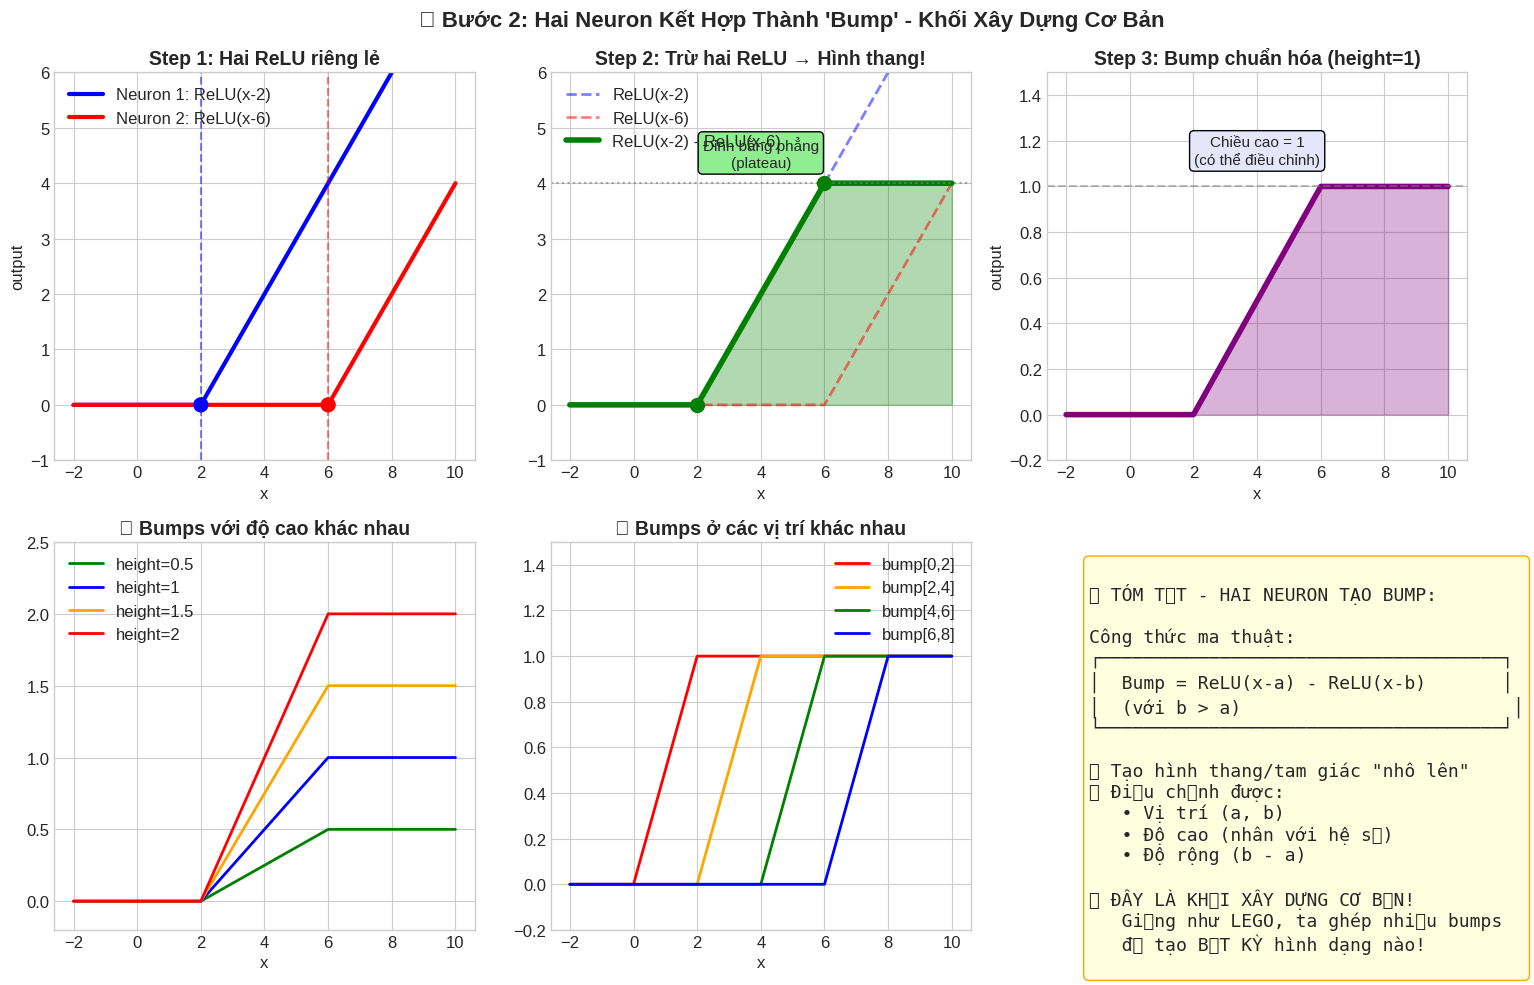

In [17]:
# ============================================
# MINH HỌA 2: Hai neuron tạo thành "BUMP"
# ============================================

def bump(x, a, b, height=1):
    """
    Tạo một "bump" (đỉnh nhô lên) giữa a và b
    Công thức: height * (ReLU(x-a) - ReLU(x-b)) / (b-a)
    """
    return height * (relu(x - a) - relu(x - b)) / (b - a)

x = np.linspace(-2, 10, 1000)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# ===== Step 1: Hai ReLU riêng lẻ =====
axes[0, 0].set_title("Step 1: Hai ReLU riêng lẻ", fontsize=14, fontweight='bold')
neuron1 = relu(x - 2)  # Bật tại x=2
neuron2 = relu(x - 6)  # Bật tại x=6
axes[0, 0].plot(x, neuron1, 'b-', linewidth=3, label='Neuron 1: ReLU(x-2)')
axes[0, 0].plot(x, neuron2, 'r-', linewidth=3, label='Neuron 2: ReLU(x-6)')
axes[0, 0].axvline(x=2, color='blue', linestyle='--', alpha=0.5)
axes[0, 0].axvline(x=6, color='red', linestyle='--', alpha=0.5)
axes[0, 0].scatter([2, 6], [0, 0], color=['blue', 'red'], s=100, zorder=5)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('output')
axes[0, 0].legend()
axes[0, 0].set_ylim(-1, 6)

# ===== Step 2: Trừ hai ReLU =====
axes[0, 1].set_title("Step 2: Trừ hai ReLU → Hình thang!", fontsize=14, fontweight='bold')
diff = neuron1 - neuron2
axes[0, 1].plot(x, neuron1, 'b--', linewidth=2, alpha=0.5, label='ReLU(x-2)')
axes[0, 1].plot(x, neuron2, 'r--', linewidth=2, alpha=0.5, label='ReLU(x-6)')
axes[0, 1].plot(x, diff, 'green', linewidth=4, label='ReLU(x-2) - ReLU(x-6)')
axes[0, 1].fill_between(x, 0, diff, where=(diff > 0), alpha=0.3, color='green')
axes[0, 1].axhline(y=4, color='gray', linestyle=':', alpha=0.7)
axes[0, 1].scatter([2, 6], [0, 4], color='green', s=100, zorder=5)
axes[0, 1].set_xlabel('x')
axes[0, 1].legend()
axes[0, 1].set_ylim(-1, 6)
axes[0, 1].annotate('Đỉnh bằng phẳng\n(plateau)', xy=(4, 4.3), fontsize=11,
                    ha='center', bbox=dict(boxstyle='round', facecolor='lightgreen'))

# ===== Step 3: Chuẩn hóa để có bump đơn vị =====
axes[0, 2].set_title("Step 3: Bump chuẩn hóa (height=1)", fontsize=14, fontweight='bold')
bump_normalized = bump(x, 2, 6, height=1)
axes[0, 2].plot(x, bump_normalized, 'purple', linewidth=4)
axes[0, 2].fill_between(x, 0, bump_normalized, alpha=0.3, color='purple')
axes[0, 2].axhline(y=1, color='gray', linestyle='--', alpha=0.5)
axes[0, 2].set_xlabel('x')
axes[0, 2].set_ylabel('output')
axes[0, 2].set_ylim(-0.2, 1.5)
axes[0, 2].annotate('Chiều cao = 1\n(có thể điều chỉnh)', xy=(4, 1.1), fontsize=11,
                    ha='center', bbox=dict(boxstyle='round', facecolor='lavender'))

# ===== Bumps với độ cao khác nhau =====
axes[1, 0].set_title("🎨 Bumps với độ cao khác nhau", fontsize=14, fontweight='bold')
heights = [0.5, 1, 1.5, 2]
colors = ['green', 'blue', 'orange', 'red']
for h, c in zip(heights, colors):
    axes[1, 0].plot(x, bump(x, 2, 6, h), color=c, linewidth=2, label=f'height={h}')
axes[1, 0].set_xlabel('x')
axes[1, 0].legend()
axes[1, 0].set_ylim(-0.2, 2.5)

# ===== Bumps ở các vị trí khác nhau =====
axes[1, 1].set_title("🎨 Bumps ở các vị trí khác nhau", fontsize=14, fontweight='bold')
positions = [(0, 2), (2, 4), (4, 6), (6, 8)]
colors = ['red', 'orange', 'green', 'blue']
for (a, b), c in zip(positions, colors):
    axes[1, 1].plot(x, bump(x, a, b, 1), color=c, linewidth=2, label=f'bump[{a},{b}]')
axes[1, 1].set_xlabel('x')
axes[1, 1].legend()
axes[1, 1].set_ylim(-0.2, 1.5)

# ===== Tóm tắt =====
axes[1, 2].axis('off')
summary_text = """
📌 TÓM TẮT - HAI NEURON TẠO BUMP:

Công thức ma thuật:
┌─────────────────────────────────────┐
│  Bump = ReLU(x-a) - ReLU(x-b)       │
│  (với b > a)                         │
└─────────────────────────────────────┘

🔹 Tạo hình thang/tam giác "nhô lên"
🔹 Điều chỉnh được:
   • Vị trí (a, b)
   • Độ cao (nhân với hệ số)
   • Độ rộng (b - a)

🎯 ĐÂY LÀ KHỐI XÂY DỰNG CƠ BẢN!
   Giống như LEGO, ta ghép nhiều bumps
   để tạo BẤT KỲ hình dạng nào!
"""
axes[1, 2].text(0.1, 0.95, summary_text, transform=axes[1, 2].transAxes,
                fontsize=13, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))

plt.tight_layout()
plt.suptitle("🧠 Bước 2: Hai Neuron Kết Hợp Thành 'Bump' - Khối Xây Dựng Cơ Bản", 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

---
## 4. 🔸🔸🔸 Nhiều Bumps - Xấp Xỉ Hàm Bậc Thang

### 💡 Ý tưởng:
Nếu ta có thể tạo **một bump với độ cao tùy ý**, ta chỉ cần:
1. Đặt nhiều bumps cạnh nhau
2. Điều chỉnh độ cao của từng bump
3. → Xấp xỉ được BẤT KỲ hàm bậc thang nào!

### 🎯 Và nếu bump đủ nhỏ (hẹp)?
→ Xấp xỉ được BẤT KỲ hàm liên tục nào!

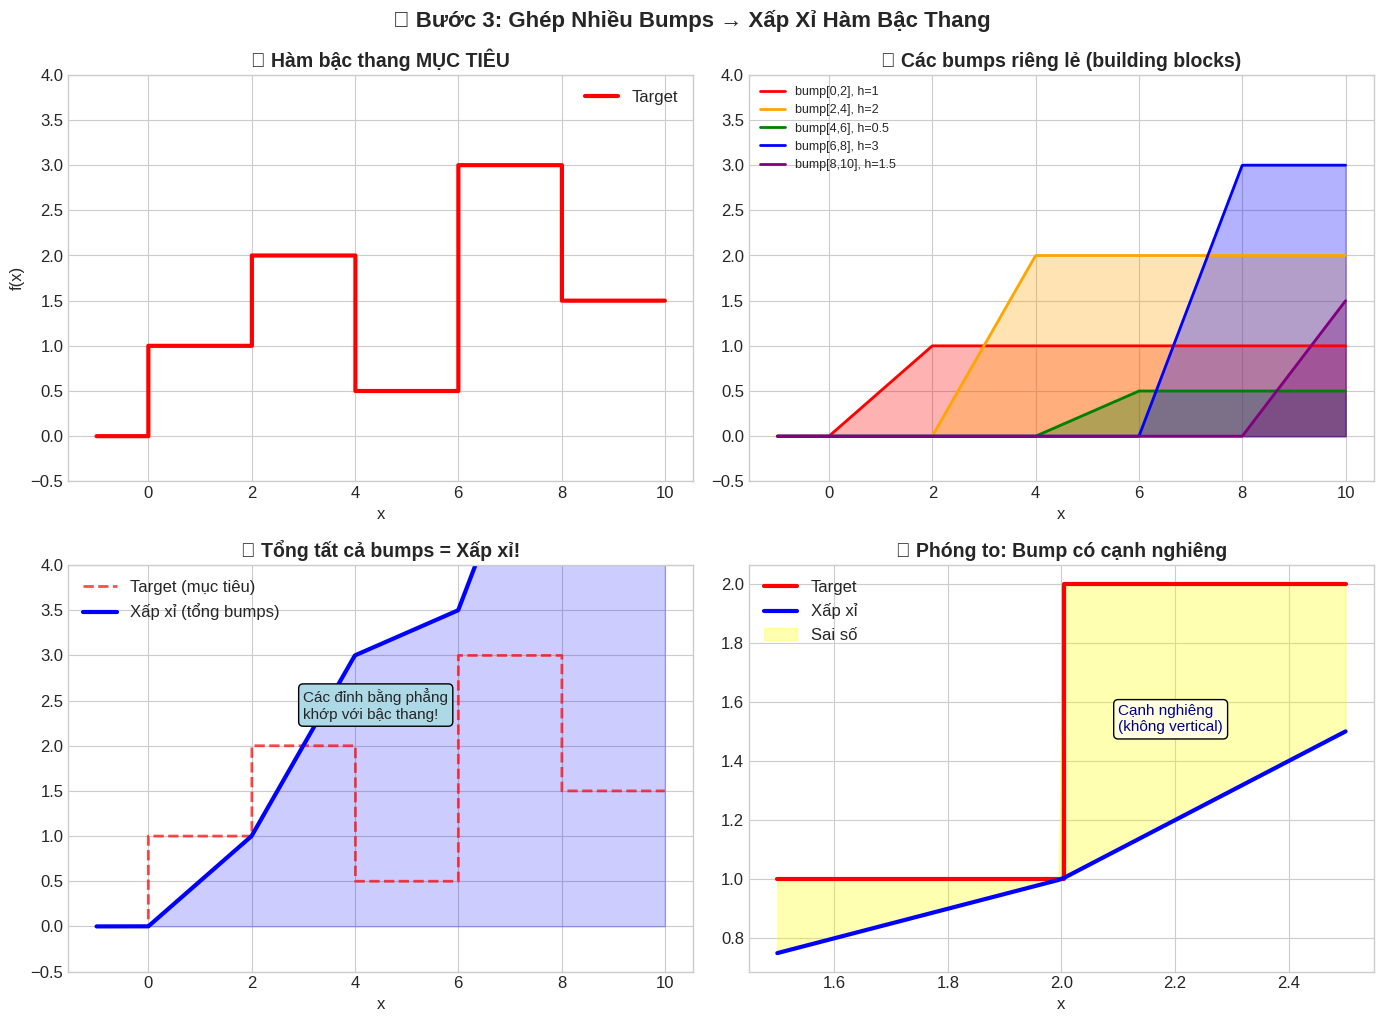

✅ Nhận xét: Với đủ nhiều bumps, ta có thể xấp xỉ hàm bậc thang!
   Cạnh nghiêng (không thẳng đứng) là sai số, nhưng bump càng hẹp → sai số càng nhỏ!


In [18]:
# ============================================
# MINH HỌA 3: Ghép nhiều bumps để xấp xỉ hàm
# ============================================

def step_function_target(x):
    """Hàm bậc thang mục tiêu"""
    result = np.zeros_like(x)
    result[(x >= 0) & (x < 2)] = 1
    result[(x >= 2) & (x < 4)] = 2
    result[(x >= 4) & (x < 6)] = 0.5
    result[(x >= 6) & (x < 8)] = 3
    result[(x >= 8)] = 1.5
    return result

def approximate_step_with_bumps(x, steps, width=2):
    """
    Xấp xỉ hàm bậc thang bằng nhiều bumps
    steps: list of (start, height) tuples
    """
    result = np.zeros_like(x)
    for start, height in steps:
        result += bump(x, start, start + width, height)
    return result

x = np.linspace(-1, 10, 1000)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ===== Hàm bậc thang mục tiêu =====
axes[0, 0].set_title("🎯 Hàm bậc thang MỤC TIÊU", fontsize=14, fontweight='bold')
target = step_function_target(x)
axes[0, 0].step(x, target, 'r-', linewidth=3, where='post', label='Target')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].legend()
axes[0, 0].set_ylim(-0.5, 4)

# ===== Các bumps riêng lẻ =====
axes[0, 1].set_title("🧱 Các bumps riêng lẻ (building blocks)", fontsize=14, fontweight='bold')
steps = [(0, 1), (2, 2), (4, 0.5), (6, 3), (8, 1.5)]
colors = ['red', 'orange', 'green', 'blue', 'purple']

for (start, height), c in zip(steps, colors):
    b = bump(x, start, start + 2, height)
    axes[0, 1].fill_between(x, 0, b, alpha=0.3, color=c)
    axes[0, 1].plot(x, b, color=c, linewidth=2, label=f'bump[{start},{start+2}], h={height}')
axes[0, 1].set_xlabel('x')
axes[0, 1].legend(fontsize=9)
axes[0, 1].set_ylim(-0.5, 4)

# ===== Tổng các bumps =====
axes[1, 0].set_title("➕ Tổng tất cả bumps = Xấp xỉ!", fontsize=14, fontweight='bold')
approximation = approximate_step_with_bumps(x, steps, width=2)
axes[1, 0].step(x, target, 'r--', linewidth=2, where='post', label='Target (mục tiêu)', alpha=0.7)
axes[1, 0].plot(x, approximation, 'b-', linewidth=3, label='Xấp xỉ (tổng bumps)')
axes[1, 0].fill_between(x, 0, approximation, alpha=0.2, color='blue')
axes[1, 0].set_xlabel('x')
axes[1, 0].legend()
axes[1, 0].set_ylim(-0.5, 4)
axes[1, 0].annotate('Các đỉnh bằng phẳng\nkhớp với bậc thang!', xy=(3, 2.3), fontsize=11,
                    bbox=dict(boxstyle='round', facecolor='lightblue'))

# ===== Phóng to để thấy sự khác biệt =====
axes[1, 1].set_title("🔍 Phóng to: Bump có cạnh nghiêng", fontsize=14, fontweight='bold')
x_zoom = np.linspace(1.5, 2.5, 100)
target_zoom = step_function_target(x_zoom)
approx_zoom = approximate_step_with_bumps(x_zoom, steps, width=2)

axes[1, 1].step(x_zoom, target_zoom, 'r-', linewidth=3, where='post', label='Target')
axes[1, 1].plot(x_zoom, approx_zoom, 'b-', linewidth=3, label='Xấp xỉ')
axes[1, 1].fill_between(x_zoom, target_zoom, approx_zoom, alpha=0.3, color='yellow', label='Sai số')
axes[1, 1].set_xlabel('x')
axes[1, 1].legend()
axes[1, 1].annotate('Cạnh nghiêng\n(không vertical)', xy=(2.1, 1.5), fontsize=11,
                    color='darkblue', bbox=dict(boxstyle='round', facecolor='lightyellow'))

plt.tight_layout()
plt.suptitle("🧠 Bước 3: Ghép Nhiều Bumps → Xấp Xỉ Hàm Bậc Thang", 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("✅ Nhận xét: Với đủ nhiều bumps, ta có thể xấp xỉ hàm bậc thang!")
print("   Cạnh nghiêng (không thẳng đứng) là sai số, nhưng bump càng hẹp → sai số càng nhỏ!")

---
## 5. 🌊 Xấp Xỉ sin(x) - Từ Thô Đến Mịn

### 💡 Bây giờ thử xấp xỉ một hàm LIÊN TỤC thật sự: $\sin(x)$

Ý tưởng:
- Chia đường cong thành nhiều đoạn nhỏ
- Mỗi đoạn sử dụng một "bump" với độ cao tương ứng
- Càng nhiều đoạn → càng mịn → càng chính xác!

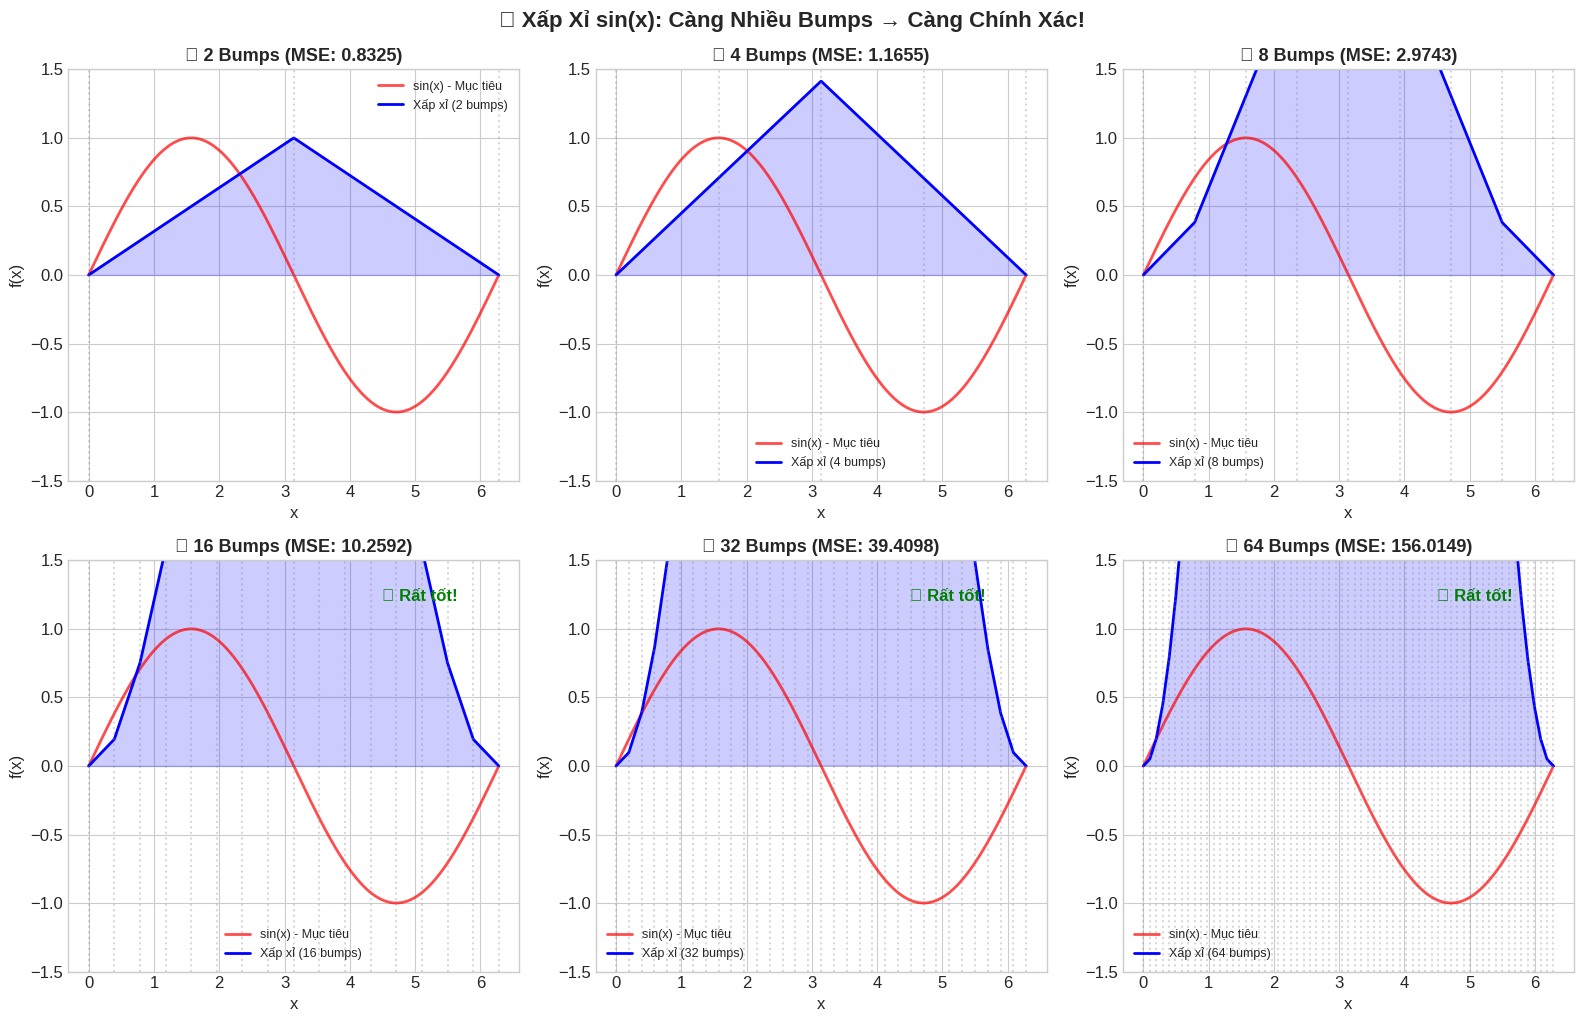


📈 Kết quả: Số bumps tăng → MSE (Mean Squared Error) giảm → Xấp xỉ tốt hơn!
   Đây chính là ý tưởng của Universal Approximation Theorem!


In [19]:
# ============================================
# MINH HỌA 4: Xấp xỉ sin(x) với số bumps tăng dần
# ============================================

def approximate_function_with_bumps(x, target_func, n_bumps, x_min, x_max):
    """
    Xấp xỉ một hàm bằng n_bumps
    Mỗi bump có độ cao = giá trị hàm tại tâm bump
    """
    result = np.zeros_like(x)
    width = (x_max - x_min) / n_bumps
    
    for i in range(n_bumps):
        start = x_min + i * width
        center = start + width / 2
        height = target_func(center)
        result += bump(x, start, start + width, height)
    
    return result

# Target function
def target_sin(x):
    return np.sin(x)

x = np.linspace(0, 2*np.pi, 1000)
target = target_sin(x)

# Các mức độ xấp xỉ khác nhau
n_bumps_list = [2, 4, 8, 16, 32, 64]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, n_bumps in enumerate(n_bumps_list):
    ax = axes[idx]
    
    # Xấp xỉ
    approx = approximate_function_with_bumps(x, target_sin, n_bumps, 0, 2*np.pi)
    
    # Tính sai số
    mse = np.mean((target - approx)**2)
    
    # Vẽ
    ax.plot(x, target, 'r-', linewidth=2, label='sin(x) - Mục tiêu', alpha=0.7)
    ax.plot(x, approx, 'b-', linewidth=2, label=f'Xấp xỉ ({n_bumps} bumps)')
    ax.fill_between(x, 0, approx, alpha=0.2, color='blue')
    
    # Vẽ các điểm chia
    width = 2*np.pi / n_bumps
    for i in range(n_bumps + 1):
        ax.axvline(x=i*width, color='gray', linestyle=':', alpha=0.3)
    
    ax.set_title(f"📊 {n_bumps} Bumps (MSE: {mse:.4f})", fontsize=13, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend(fontsize=9)
    ax.set_ylim(-1.5, 1.5)
    
    # Thêm emoji để highlight improvement
    if n_bumps >= 16:
        ax.annotate('✅ Rất tốt!', xy=(4.5, 1.2), fontsize=12, color='green', fontweight='bold')

plt.tight_layout()
plt.suptitle("🌊 Xấp Xỉ sin(x): Càng Nhiều Bumps → Càng Chính Xác!", 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n📈 Kết quả: Số bumps tăng → MSE (Mean Squared Error) giảm → Xấp xỉ tốt hơn!")
print("   Đây chính là ý tưởng của Universal Approximation Theorem!")

---
## 6. 🧠 Thực Hành: Train Neural Network Thật Sự!

### Bây giờ hãy xem một **Neural Network thật sự** học xấp xỉ sin(x) như thế nào!

Chúng ta sẽ:
1. Tạo dữ liệu từ $\sin(x)$
2. Train một neural network đơn giản với 1 hidden layer
3. Quan sát xấp xỉ cải thiện khi tăng số neurons

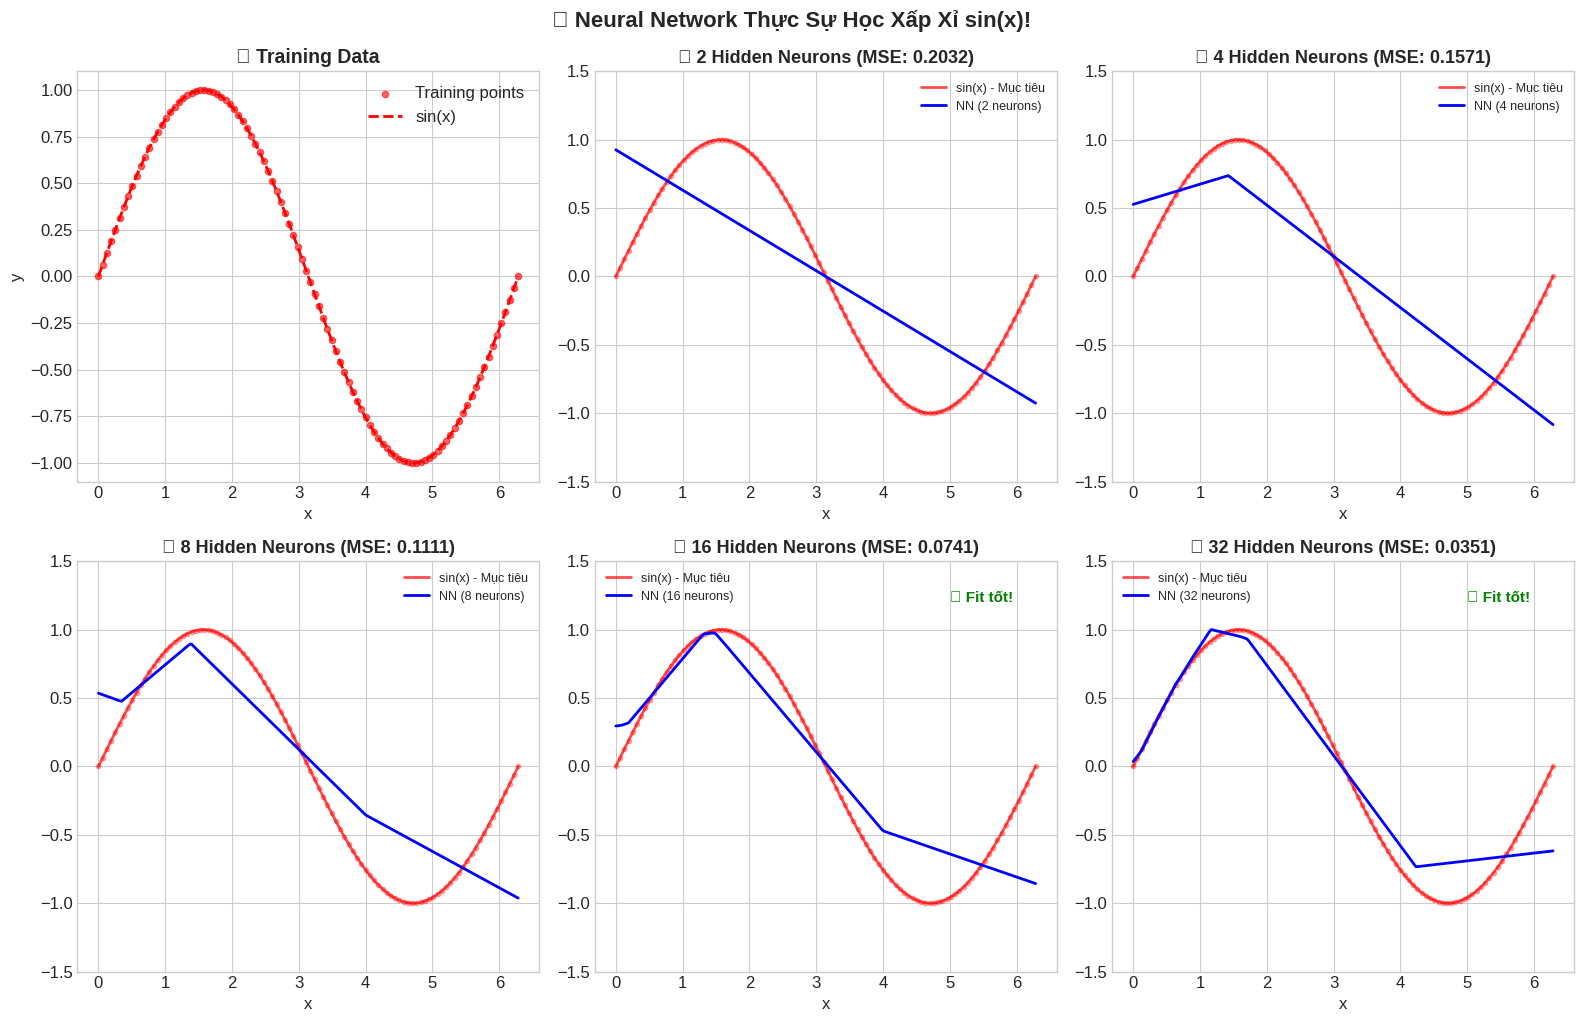


🎯 KẾT LUẬN:
   • 2 neurons: Chỉ có 2 điểm gấp → xấp xỉ thô
   • 4 neurons: 4 điểm gấp → bắt đầu thấy hình dạng
   • 8+ neurons: Nhiều điểm gấp → fit rất tốt!
   • Càng nhiều neurons → càng nhiều 'khúc cua' → xấp xỉ càng mịn!


In [20]:
# ============================================
# MINH HỌA 5: Train Neural Network thật sự!
# ============================================

# Sử dụng pure numpy để minh họa rõ hơn cơ chế
# (không cần PyTorch/TensorFlow)

class SimpleNeuralNetwork:
    """
    Neural Network đơn giản với 1 hidden layer
    Input(1) -> Hidden(n_neurons, ReLU) -> Output(1)
    """
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        # Khởi tạo weights ngẫu nhiên
        np.random.seed(42)
        self.W1 = np.random.randn(1, n_hidden) * 0.5  # Input -> Hidden
        self.b1 = np.random.randn(1, n_hidden) * 0.5
        self.W2 = np.random.randn(n_hidden, 1) * 0.5  # Hidden -> Output
        self.b2 = np.random.randn(1, 1) * 0.5
        
    def forward(self, x):
        """Forward pass"""
        x = x.reshape(-1, 1)
        self.z1 = x @ self.W1 + self.b1  # Linear
        self.a1 = np.maximum(0, self.z1)  # ReLU
        self.z2 = self.a1 @ self.W2 + self.b2  # Linear
        return self.z2.flatten()
    
    def train(self, X, y, epochs=2000, lr=0.01):
        """Train với gradient descent"""
        losses = []
        for epoch in range(epochs):
            # Forward
            pred = self.forward(X)
            loss = np.mean((pred - y)**2)
            losses.append(loss)
            
            # Backward (gradient descent)
            n = len(X)
            X_reshaped = X.reshape(-1, 1)
            y_reshaped = y.reshape(-1, 1)
            
            # Output layer gradients
            dz2 = (self.z2 - y_reshaped) * 2 / n
            dW2 = self.a1.T @ dz2
            db2 = np.sum(dz2, axis=0, keepdims=True)
            
            # Hidden layer gradients
            da1 = dz2 @ self.W2.T
            dz1 = da1 * (self.z1 > 0)  # ReLU derivative
            dW1 = X_reshaped.T @ dz1
            db1 = np.sum(dz1, axis=0, keepdims=True)
            
            # Update weights
            self.W2 -= lr * dW2
            self.b2 -= lr * db2
            self.W1 -= lr * dW1
            self.b1 -= lr * db1
            
        return losses

# Tạo dữ liệu training
np.random.seed(0)
X_train = np.linspace(0, 2*np.pi, 100)
y_train = np.sin(X_train)

# Test với số neurons khác nhau
n_neurons_list = [2, 4, 8, 16, 32]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plot training data
axes[0, 0].set_title("📊 Training Data", fontsize=14, fontweight='bold')
axes[0, 0].scatter(X_train, y_train, c='red', s=20, alpha=0.6, label='Training points')
axes[0, 0].plot(X_train, np.sin(X_train), 'r--', linewidth=2, label='sin(x)')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].legend()

# Train và visualize với số neurons khác nhau
for idx, n_neurons in enumerate(n_neurons_list):
    ax = axes.flatten()[idx + 1]
    
    # Tạo và train network
    nn = SimpleNeuralNetwork(n_hidden=n_neurons)
    losses = nn.train(X_train, y_train, epochs=3000, lr=0.01)
    
    # Predict
    X_test = np.linspace(0, 2*np.pi, 200)
    y_pred = nn.forward(X_test)
    y_true = np.sin(X_test)
    
    # Tính MSE cuối
    final_mse = losses[-1]
    
    # Vẽ
    ax.plot(X_test, y_true, 'r-', linewidth=2, label='sin(x) - Mục tiêu', alpha=0.7)
    ax.plot(X_test, y_pred, 'b-', linewidth=2, label=f'NN ({n_neurons} neurons)')
    ax.scatter(X_train, y_train, c='red', s=10, alpha=0.3)
    
    ax.set_title(f"🧠 {n_neurons} Hidden Neurons (MSE: {final_mse:.4f})", 
                 fontsize=13, fontweight='bold')
    ax.set_xlabel('x')
    ax.legend(fontsize=9)
    ax.set_ylim(-1.5, 1.5)
    
    # Highlight good results
    if n_neurons >= 16:
        ax.annotate('✅ Fit tốt!', xy=(5, 1.2), fontsize=11, color='green', fontweight='bold')

plt.tight_layout()
plt.suptitle("🧠 Neural Network Thực Sự Học Xấp Xỉ sin(x)!", 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n🎯 KẾT LUẬN:")
print("   • 2 neurons: Chỉ có 2 điểm gấp → xấp xỉ thô")
print("   • 4 neurons: 4 điểm gấp → bắt đầu thấy hình dạng")
print("   • 8+ neurons: Nhiều điểm gấp → fit rất tốt!")
print("   • Càng nhiều neurons → càng nhiều 'khúc cua' → xấp xỉ càng mịn!")

---
## 7. 🎨 Xấp Xỉ Hàm Phức Tạp Hơn

### Thử với hàm phức tạp hơn:
$$f(x) = x \cdot \sin(3x) + \cos(5x)$$

Hàm này có nhiều "lượn sóng" hơn → cần nhiều neurons hơn để xấp xỉ!

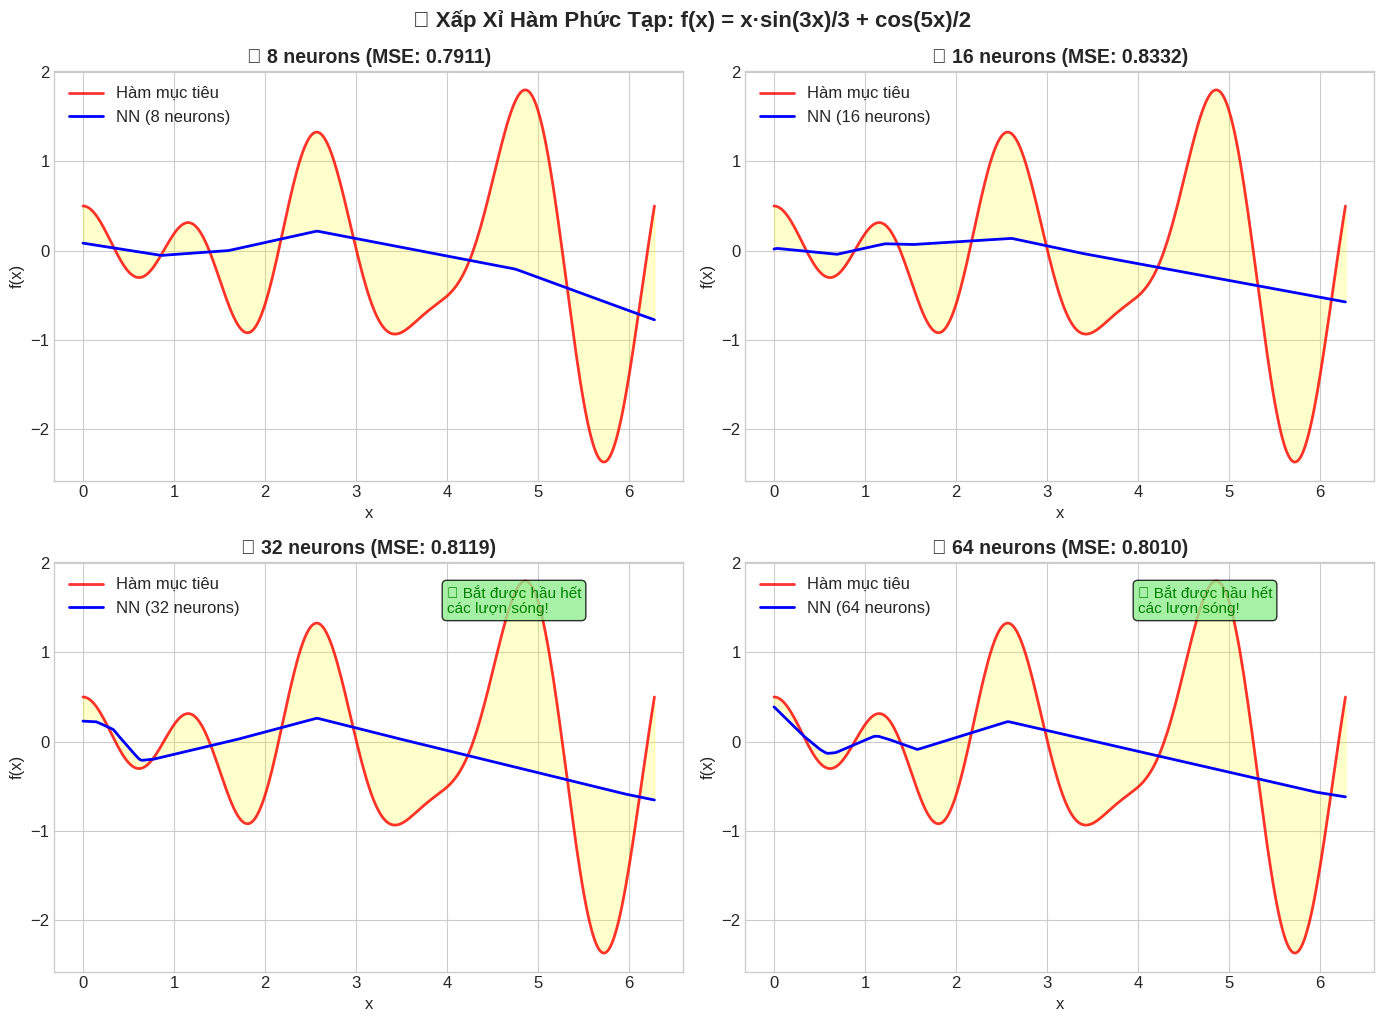


📊 Nhận xét:
   • Hàm phức tạp hơn → cần nhiều neurons hơn
   • 8 neurons: Miss nhiều lượn sóng
   • 32+ neurons: Bắt được hầu hết chi tiết


In [21]:
# ============================================
# MINH HỌA 6: Xấp xỉ hàm phức tạp hơn
# ============================================

def complex_function(x):
    """Hàm phức tạp với nhiều lượn sóng"""
    return x * np.sin(3*x) / 3 + np.cos(5*x) / 2

# Tạo dữ liệu
X_train = np.linspace(0, 2*np.pi, 150)
y_train = complex_function(X_train)

# So sánh các kiến trúc khác nhau
configs = [
    (8, "8 neurons"),
    (16, "16 neurons"),
    (32, "32 neurons"),
    (64, "64 neurons"),
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

X_test = np.linspace(0, 2*np.pi, 300)
y_true = complex_function(X_test)

for idx, (n_neurons, label) in enumerate(configs):
    ax = axes[idx]
    
    # Train network
    np.random.seed(42)
    nn = SimpleNeuralNetwork(n_hidden=n_neurons)
    losses = nn.train(X_train, y_train, epochs=5000, lr=0.005)
    
    # Predict
    y_pred = nn.forward(X_test)
    final_mse = losses[-1]
    
    # Vẽ
    ax.plot(X_test, y_true, 'r-', linewidth=2, label='Hàm mục tiêu', alpha=0.8)
    ax.plot(X_test, y_pred, 'b-', linewidth=2, label=f'NN ({label})')
    ax.fill_between(X_test, y_true, y_pred, alpha=0.2, color='yellow')
    
    ax.set_title(f"🧠 {label} (MSE: {final_mse:.4f})", fontsize=14, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    
    # Đếm số "khúc cua" đúng
    if n_neurons >= 32:
        ax.annotate('✅ Bắt được hầu hết\ncác lượn sóng!', 
                    xy=(4, max(y_true)*0.8), fontsize=11, color='green',
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.suptitle(f"🎨 Xấp Xỉ Hàm Phức Tạp: f(x) = x·sin(3x)/3 + cos(5x)/2", 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n📊 Nhận xét:")
print("   • Hàm phức tạp hơn → cần nhiều neurons hơn")
print("   • 8 neurons: Miss nhiều lượn sóng")
print("   • 32+ neurons: Bắt được hầu hết chi tiết")

---
## 8. 🔬 Nhìn Sâu Hơn: Mỗi Neuron Đóng Góp Gì?

### Hãy "mổ xẻ" một neural network đã train để xem từng neuron làm gì!

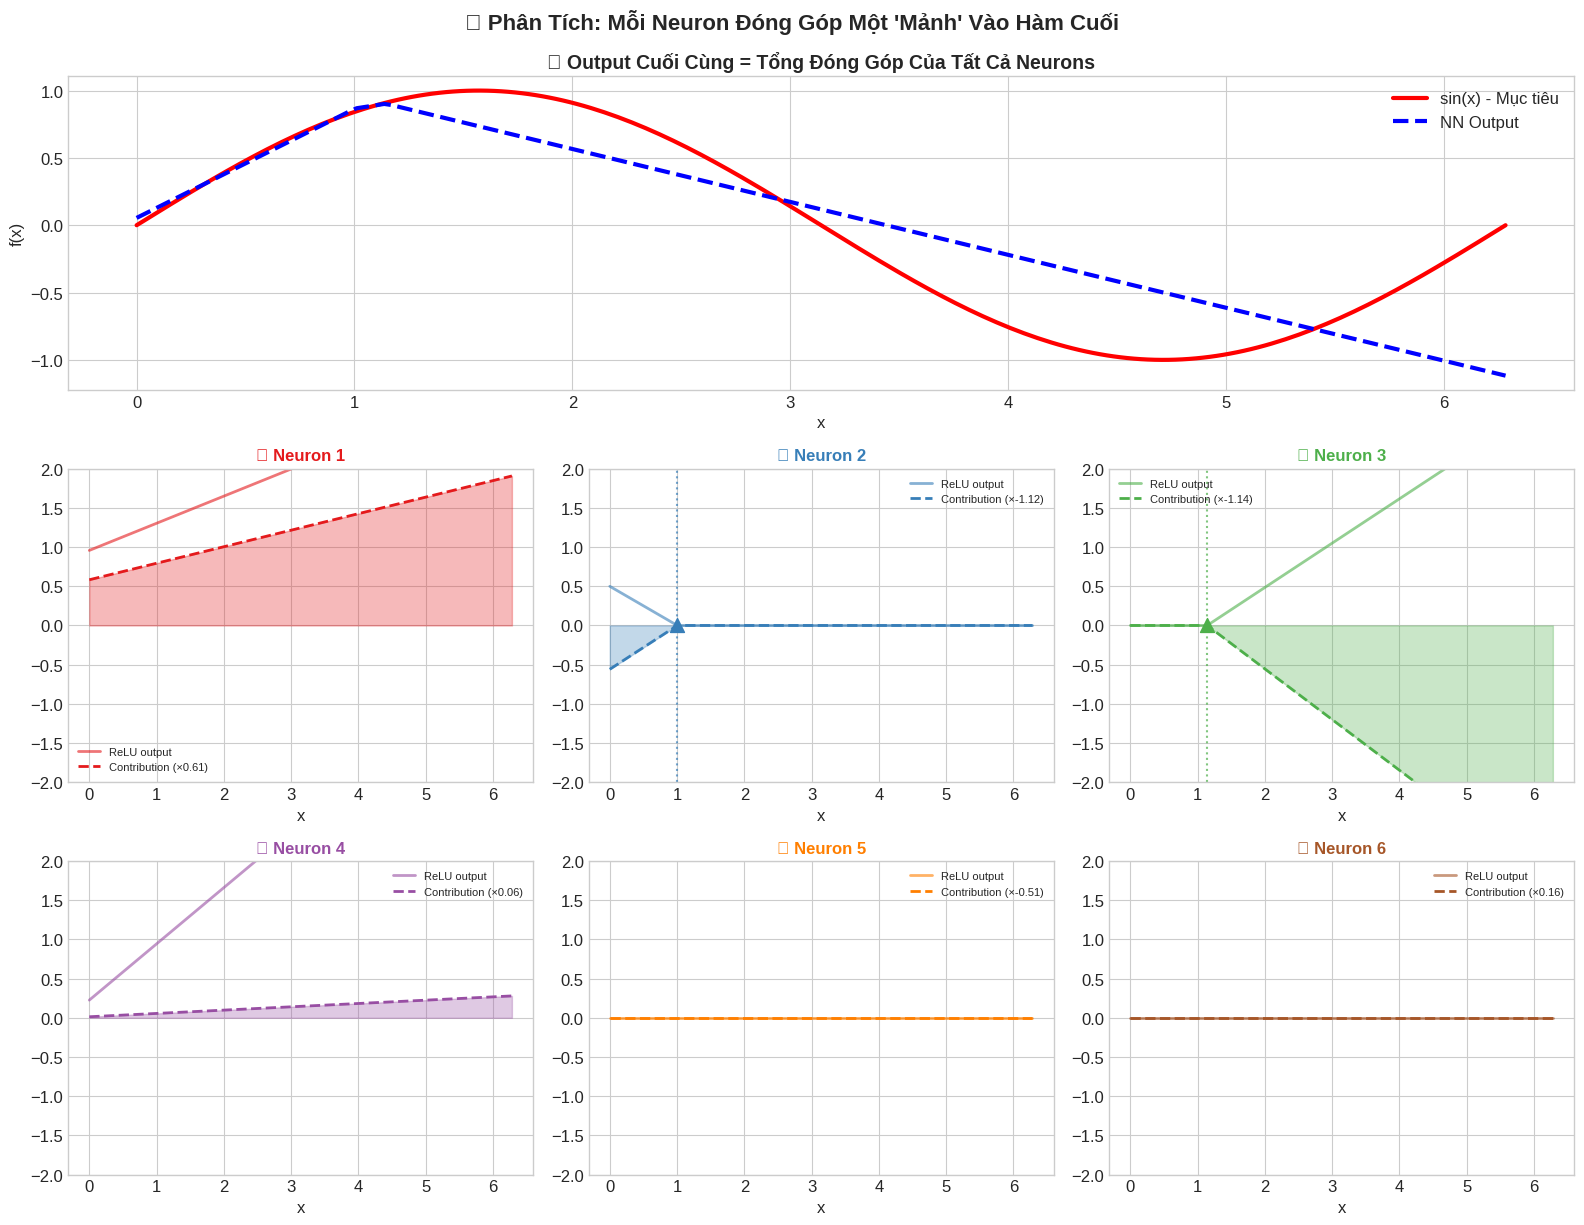


🎯 INSIGHT QUAN TRỌNG:
   • Mỗi neuron tạo ra MỘT đường gấp khúc (kink)
   • Đường gấp khúc có vị trí và độ dốc khác nhau
   • Weight W2 điều khiển 'đóng góp' của mỗi neuron vào output
   • Tổng tất cả đóng góp = hàm xấp xỉ cuối cùng!


In [22]:
# ============================================
# MINH HỌA 7: Phân tích đóng góp của từng neuron
# ============================================

# Train một network với 6 neurons để dễ visualize
np.random.seed(123)
n_neurons = 6

# Tạo dữ liệu đơn giản hơn
X_train = np.linspace(0, 2*np.pi, 100)
y_train = np.sin(X_train)

# Train
nn = SimpleNeuralNetwork(n_hidden=n_neurons)
nn.train(X_train, y_train, epochs=5000, lr=0.01)

# Phân tích từng neuron
X_test = np.linspace(0, 2*np.pi, 200)

fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, figure=fig)

# === Plot 1: Hàm mục tiêu và output cuối ===
ax_main = fig.add_subplot(gs[0, :])
y_pred = nn.forward(X_test)
ax_main.plot(X_test, np.sin(X_test), 'r-', linewidth=3, label='sin(x) - Mục tiêu')
ax_main.plot(X_test, y_pred, 'b--', linewidth=3, label='NN Output')
ax_main.set_title("🎯 Output Cuối Cùng = Tổng Đóng Góp Của Tất Cả Neurons", 
                  fontsize=14, fontweight='bold')
ax_main.legend()
ax_main.set_xlabel('x')
ax_main.set_ylabel('f(x)')

# === Plot 2-7: Đóng góp của từng neuron ===
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628']

for i in range(n_neurons):
    row = 1 + i // 3
    col = i % 3
    ax = fig.add_subplot(gs[row, col])
    
    # Tính output của neuron i
    X_reshaped = X_test.reshape(-1, 1)
    z1 = X_reshaped @ nn.W1 + nn.b1  # Tất cả neurons
    a1 = np.maximum(0, z1)  # ReLU
    
    # Đóng góp của neuron i vào output cuối
    neuron_output = a1[:, i]  # Output của neuron i (sau ReLU)
    contribution = neuron_output * nn.W2[i, 0]  # Nhân với weight ra output
    
    # Vẽ
    ax.plot(X_test, neuron_output, color=colors[i], linewidth=2, 
            label=f'ReLU output', alpha=0.6)
    ax.fill_between(X_test, 0, contribution, color=colors[i], alpha=0.3)
    ax.plot(X_test, contribution, color=colors[i], linewidth=2, linestyle='--',
            label=f'Contribution (×{nn.W2[i,0]:.2f})')
    
    # Đánh dấu điểm gấp khúc
    kink_point = -nn.b1[0, i] / nn.W1[0, i] if nn.W1[0, i] != 0 else 0
    if 0 <= kink_point <= 2*np.pi:
        ax.axvline(x=kink_point, color=colors[i], linestyle=':', alpha=0.7)
        ax.scatter([kink_point], [0], color=colors[i], s=100, zorder=5, marker='^')
    
    ax.set_title(f"🔸 Neuron {i+1}", fontsize=12, fontweight='bold', color=colors[i])
    ax.set_xlabel('x')
    ax.legend(fontsize=8)
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.suptitle("🔬 Phân Tích: Mỗi Neuron Đóng Góp Một 'Mảnh' Vào Hàm Cuối", 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n🎯 INSIGHT QUAN TRỌNG:")
print("   • Mỗi neuron tạo ra MỘT đường gấp khúc (kink)")
print("   • Đường gấp khúc có vị trí và độ dốc khác nhau")
print("   • Weight W2 điều khiển 'đóng góp' của mỗi neuron vào output")
print("   • Tổng tất cả đóng góp = hàm xấp xỉ cuối cùng!")

---
## 9. 📊 Visualization: Quá Trình Training

### Hãy xem neural network "học" như thế nào qua các epochs!

In [23]:
# ============================================
# MINH HỌA 8: Quá trình training
# ============================================

class NNWithHistory(SimpleNeuralNetwork):
    """Neural Network lưu lại history để visualize"""
    
    def train_with_snapshots(self, X, y, epochs=3000, lr=0.01, snapshot_every=100):
        """Train và lưu snapshot tại các thời điểm"""
        snapshots = []
        losses = []
        
        for epoch in range(epochs):
            # Forward
            pred = self.forward(X)
            loss = np.mean((pred - y)**2)
            losses.append(loss)
            
            # Save snapshot
            if epoch % snapshot_every == 0:
                X_test = np.linspace(0, 2*np.pi, 200)
                y_pred = self.forward(X_test)
                snapshots.append({
                    'epoch': epoch,
                    'prediction': y_pred.copy(),
                    'loss': loss
                })
            
            # Backward (same as before)
            n = len(X)
            X_reshaped = X.reshape(-1, 1)
            y_reshaped = y.reshape(-1, 1)
            
            dz2 = (self.z2 - y_reshaped) * 2 / n
            dW2 = self.a1.T @ dz2
            db2 = np.sum(dz2, axis=0, keepdims=True)
            
            da1 = dz2 @ self.W2.T
            dz1 = da1 * (self.z1 > 0)
            dW1 = X_reshaped.T @ dz1
            db1 = np.sum(dz1, axis=0, keepdims=True)
            
            self.W2 -= lr * dW2
            self.b2 -= lr * db2
            self.W1 -= lr * dW1
            self.b1 -= lr * db1
        
        # Final snapshot
        X_test = np.linspace(0, 2*np.pi, 200)
        y_pred = self.forward(X_test)
        snapshots.append({
            'epoch': epochs,
            'prediction': y_pred.copy(),
            'loss': losses[-1]
        })
        
        return losses, snapshots

# Train và lấy snapshots
np.random.seed(42)
X_train = np.linspace(0, 2*np.pi, 100)
y_train = np.sin(X_train)

nn = NNWithHistory(n_hidden=16)
losses, snapshots = nn.train_with_snapshots(X_train, y_train, epochs=3000, snapshot_every=300)

# Visualize
X_test = np.linspace(0, 2*np.pi, 200)
y_true = np.sin(X_test)

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

# Row 1: Snapshots qua các epochs
snapshot_indices = [0, 1, 3, 5, 7, 9, -1][:4]
for idx, snap_idx in enumerate(snapshot_indices):
    ax = axes[0, idx]
    snap = snapshots[min(snap_idx, len(snapshots)-1)]
    
    ax.plot(X_test, y_true, 'r-', linewidth=2, label='sin(x)', alpha=0.7)
    ax.plot(X_test, snap['prediction'], 'b-', linewidth=2, label='NN')
    ax.fill_between(X_test, y_true, snap['prediction'], alpha=0.2, color='yellow')
    
    ax.set_title(f"Epoch {snap['epoch']}\nLoss: {snap['loss']:.4f}", 
                 fontsize=12, fontweight='bold')
    ax.set_ylim(-1.5, 1.5)
    ax.legend(fontsize=8)
    
# Row 2: More epochs
for idx, snap_idx in enumerate([len(snapshots)//2, len(snapshots)*2//3, len(snapshots)*5//6, -1]):
    ax = axes[1, idx]
    snap = snapshots[min(snap_idx, len(snapshots)-1)]
    
    ax.plot(X_test, y_true, 'r-', linewidth=2, label='sin(x)', alpha=0.7)
    ax.plot(X_test, snap['prediction'], 'b-', linewidth=2, label='NN')
    ax.fill_between(X_test, y_true, snap['prediction'], alpha=0.2, color='yellow')
    
    ax.set_title(f"Epoch {snap['epoch']}\nLoss: {snap['loss']:.4f}", 
                 fontsize=12, fontweight='bold')
    ax.set_ylim(-1.5, 1.5)
    ax.legend(fontsize=8)
    
    if snap_idx == -1:
        ax.annotate('✅ Converged!', xy=(1, 1.2), fontsize=12, 
                    color='green', fontweight='bold')

plt.tight_layout()
plt.suptitle("🎬 Quá Trình Training: NN Học 'Bẻ Cong' Đường Thẳng!", 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Plot loss curve
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(losses, 'b-', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE Loss')
ax.set_title('📉 Loss Curve: Sai Số Giảm Dần Qua Các Epochs', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)
plt.show()

print("\n🎬 NHẬN XÉT:")
print("   • Ban đầu: NN chỉ là đường gần như thẳng")
print("   • Dần dần: Các 'khúc cua' xuất hiện và điều chỉnh")
print("   • Cuối cùng: NN 'học' được hình dạng của sin(x)!")

ValueError: operands could not be broadcast together with shapes (200,1) (100,1) 

---
## 10. 🎮 Demo Tương Tác: Tự Khám Phá!

### Điều chỉnh số neurons và xem kết quả thay đổi!

🎮 DEMO: Thay đổi số neurons để thấy sự khác biệt!


▶ Testing với 4 neurons:


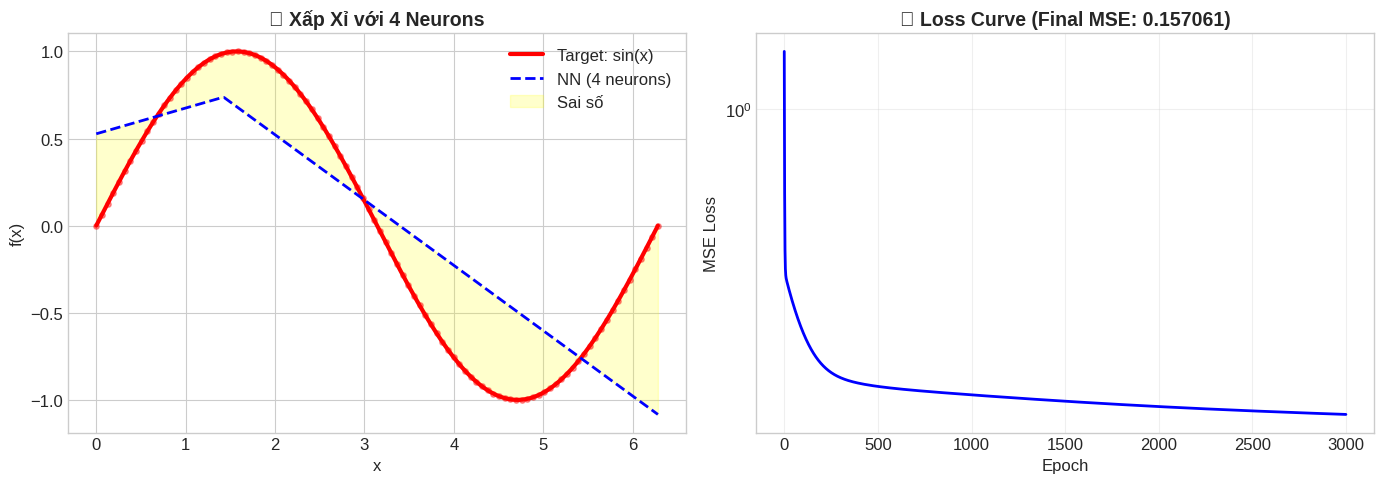

  Final MSE: 0.157061

▶ Testing với 16 neurons:


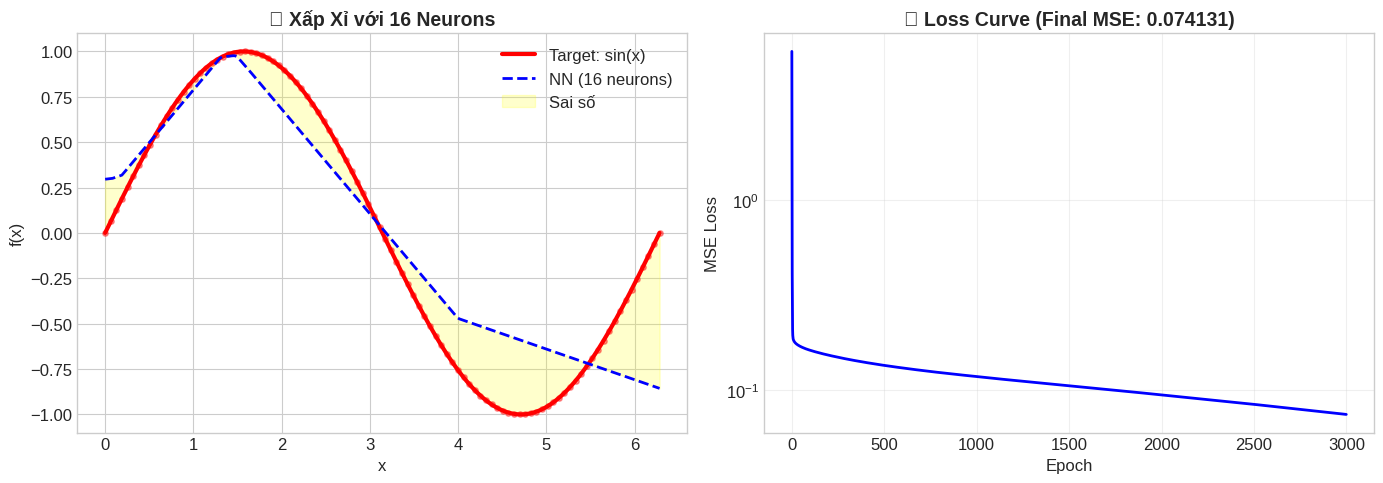

  Final MSE: 0.074131

▶ Testing với 32 neurons:


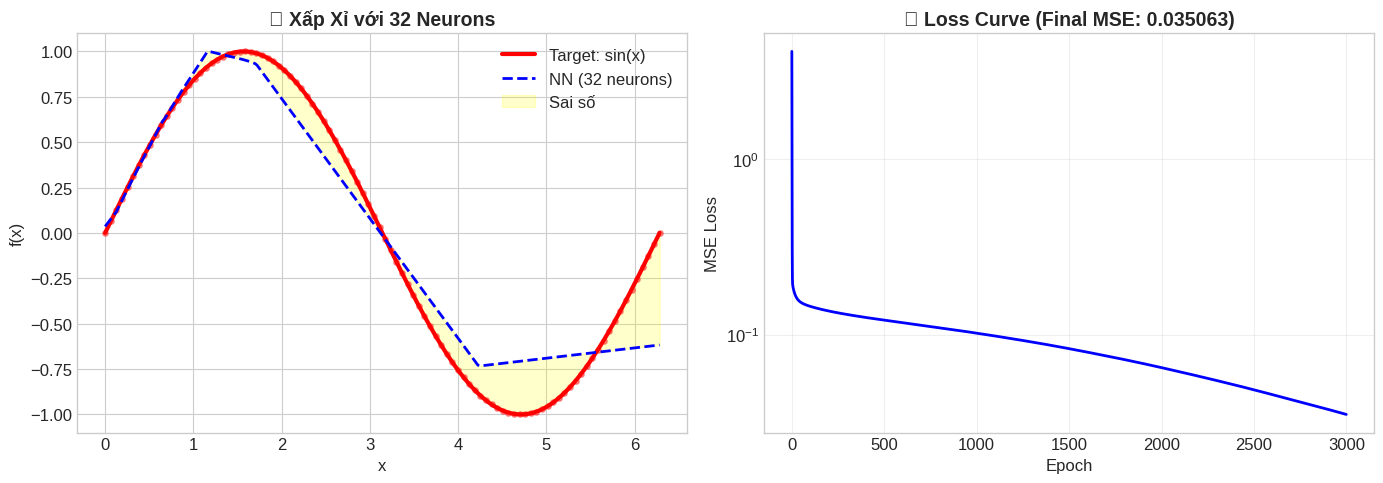

  Final MSE: 0.035063


In [24]:
# ============================================
# DEMO TƯƠNG TÁC: Thay đổi tham số và xem kết quả
# ============================================

def interactive_demo(n_neurons=8, target_func='sin', epochs=3000):
    """
    Demo tương tác
    
    Parameters:
    - n_neurons: Số neurons trong hidden layer (2-64)
    - target_func: 'sin', 'complex', hoặc 'square'
    - epochs: Số epochs training
    """
    
    # Chọn hàm mục tiêu
    if target_func == 'sin':
        func = lambda x: np.sin(x)
        title = "sin(x)"
    elif target_func == 'complex':
        func = lambda x: x * np.sin(3*x) / 3 + np.cos(5*x) / 2
        title = "x·sin(3x)/3 + cos(5x)/2"
    elif target_func == 'square':
        func = lambda x: np.sin(x)**2
        title = "sin²(x)"
    else:
        func = lambda x: np.sin(x)
        title = "sin(x)"
    
    # Tạo dữ liệu
    X_train = np.linspace(0, 2*np.pi, 100)
    y_train = func(X_train)
    
    # Train
    np.random.seed(42)
    nn = SimpleNeuralNetwork(n_hidden=n_neurons)
    losses = nn.train(X_train, y_train, epochs=epochs, lr=0.01)
    
    # Test
    X_test = np.linspace(0, 2*np.pi, 300)
    y_true = func(X_test)
    y_pred = nn.forward(X_test)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Function approximation
    axes[0].plot(X_test, y_true, 'r-', linewidth=3, label=f'Target: {title}')
    axes[0].plot(X_test, y_pred, 'b--', linewidth=2, label=f'NN ({n_neurons} neurons)')
    axes[0].fill_between(X_test, y_true, y_pred, alpha=0.2, color='yellow', label='Sai số')
    axes[0].scatter(X_train, y_train, c='red', s=15, alpha=0.4)
    axes[0].set_title(f"🧠 Xấp Xỉ với {n_neurons} Neurons", fontsize=14, fontweight='bold')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('f(x)')
    axes[0].legend()
    
    # Plot 2: Loss curve
    axes[1].plot(losses, 'b-', linewidth=2)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('MSE Loss')
    axes[1].set_title(f"📉 Loss Curve (Final MSE: {losses[-1]:.6f})", fontsize=14, fontweight='bold')
    axes[1].set_yscale('log')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return losses[-1]

# ===== THỬ NGHIỆM KHÁC NHAU =====
print("🎮 DEMO: Thay đổi số neurons để thấy sự khác biệt!\n")
print("=" * 60)

# Test với các số neurons khác nhau
for n in [4, 16, 32]:
    print(f"\n▶ Testing với {n} neurons:")
    final_loss = interactive_demo(n_neurons=n, target_func='sin', epochs=3000)
    print(f"  Final MSE: {final_loss:.6f}")

---
## 🎯 Tổng Kết: Universal Approximation Theorem

### ✅ Những gì chúng ta đã học:

| Khái niệm | Giải thích |
|-----------|------------|
| **1 Neuron + ReLU** | Tạo **1 điểm gấp khúc** (kink) |
| **2 Neurons** | Có thể tạo **1 bump** (đỉnh nhô lên) |
| **N Neurons** | Có thể tạo **N/2 bumps** với độ cao tùy ý |
| **Nhiều bumps** | Xấp xỉ **BẤT KỲ hàm liên tục** nào! |

### 🧠 Universal Approximation Theorem nói gì?

> *"Một neural network với **một hidden layer** và **đủ nhiều neurons** (sử dụng activation function non-linear như ReLU, Sigmoid, Tanh) có thể xấp xỉ **bất kỳ hàm liên tục nào** trên một miền compact với độ chính xác tùy ý."*

### 💡 Trực giác:
```
Hàm mục tiêu ≈ Σ (các bump với vị trí và độ cao khác nhau)
            ≈ Σ (output của các neurons × weights)
```

### ⚠️ Lưu ý quan trọng:
1. **Định lý chỉ nói về sự TỒN TẠI** - không đảm bảo ta tìm được weights đúng!
2. **Training** (gradient descent) mới là phần khó - tìm đúng weights
3. **Thực tế**: Deep networks (nhiều layers) thường hiệu quả hơn shallow wide networks
4. **Generalization**: Xấp xỉ tốt trên training data ≠ tốt trên data mới (overfitting)

### 🎨 Hình ảnh để nhớ:
```
Hàm phức tạp bất kỳ
        ↓
[Chia thành nhiều đoạn nhỏ]
        ↓
[Mỗi đoạn ≈ 1 bump từ 2 neurons]
        ↓
[Tổng hợp tất cả bumps]
        ↓
Xấp xỉ hoàn hảo! ✅
```

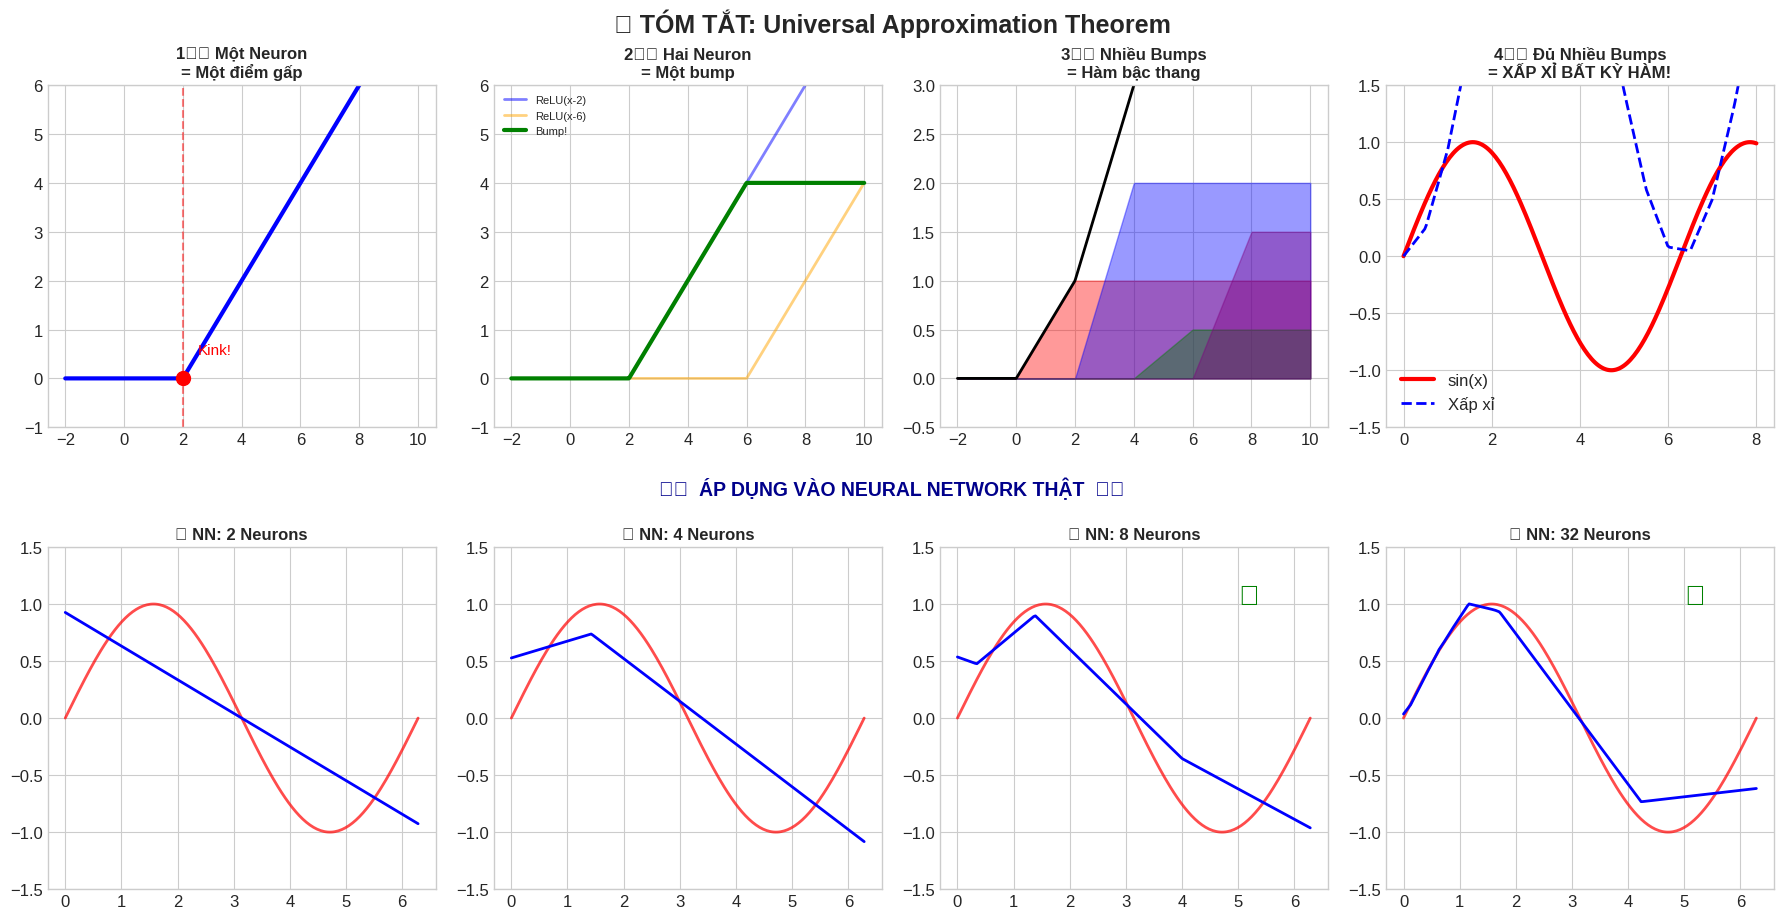


🎓 KẾT LUẬN CUỐI CÙNG:

   📌 Neural Network có thể xấp xỉ MỌI hàm liên tục vì:

   1. Mỗi neuron với ReLU = 1 điểm gấp khúc
   2. 2 neurons = 1 bump (đỉnh nhô lên)  
   3. Nhiều bumps = xấp xỉ bất kỳ hình dạng nào
   4. Training (gradient descent) tìm vị trí + độ cao tối ưu cho các bumps

   ✨ Đó là sức mạnh của Deep Learning!



In [25]:
# ============================================
# MINH HỌA CUỐI: Tóm tắt bằng hình ảnh
# ============================================

fig, axes = plt.subplots(2, 4, figsize=(18, 9))

x = np.linspace(-2, 10, 500)

# Row 1: Từ 1 neuron đến bump
# 1.1 Một ReLU
axes[0, 0].plot(x, relu(x-2), 'blue', linewidth=3)
axes[0, 0].axvline(x=2, color='red', linestyle='--', alpha=0.5)
axes[0, 0].scatter([2], [0], color='red', s=100, zorder=5)
axes[0, 0].set_title("1️⃣ Một Neuron\n= Một điểm gấp", fontsize=12, fontweight='bold')
axes[0, 0].set_ylim(-1, 6)
axes[0, 0].annotate('Kink!', xy=(2.5, 0.5), fontsize=11, color='red')

# 1.2 Hai ReLU ngược chiều
axes[0, 1].plot(x, relu(x-2), 'blue', linewidth=2, alpha=0.5, label='ReLU(x-2)')
axes[0, 1].plot(x, relu(x-6), 'orange', linewidth=2, alpha=0.5, label='ReLU(x-6)')
axes[0, 1].plot(x, relu(x-2)-relu(x-6), 'green', linewidth=3, label='Bump!')
axes[0, 1].set_title("2️⃣ Hai Neuron\n= Một bump", fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=8)
axes[0, 1].set_ylim(-1, 6)

# 1.3 Nhiều bumps
axes[0, 2].fill_between(x, 0, bump(x, 0, 2, 1), alpha=0.4, color='red')
axes[0, 2].fill_between(x, 0, bump(x, 2, 4, 2), alpha=0.4, color='blue')
axes[0, 2].fill_between(x, 0, bump(x, 4, 6, 0.5), alpha=0.4, color='green')
axes[0, 2].fill_between(x, 0, bump(x, 6, 8, 1.5), alpha=0.4, color='purple')
total = bump(x,0,2,1) + bump(x,2,4,2) + bump(x,4,6,0.5) + bump(x,6,8,1.5)
axes[0, 2].plot(x, total, 'black', linewidth=2)
axes[0, 2].set_title("3️⃣ Nhiều Bumps\n= Hàm bậc thang", fontsize=12, fontweight='bold')
axes[0, 2].set_ylim(-0.5, 3)

# 1.4 Xấp xỉ hàm
X_test = np.linspace(0, 8, 200)
approx = approximate_function_with_bumps(X_test, lambda z: np.sin(z), 16, 0, 8)
axes[0, 3].plot(X_test, np.sin(X_test), 'r-', linewidth=3, label='sin(x)')
axes[0, 3].plot(X_test, approx, 'b--', linewidth=2, label='Xấp xỉ')
axes[0, 3].set_title("4️⃣ Đủ Nhiều Bumps\n= XẤP XỈ BẤT KỲ HÀM!", fontsize=12, fontweight='bold')
axes[0, 3].legend()
axes[0, 3].set_ylim(-1.5, 1.5)

# Row 2: Ví dụ thực tế với Neural Network
n_list = [2, 4, 8, 32]
X_train = np.linspace(0, 2*np.pi, 100)
y_train = np.sin(X_train)
X_test = np.linspace(0, 2*np.pi, 200)

for idx, n in enumerate(n_list):
    ax = axes[1, idx]
    np.random.seed(42)
    nn = SimpleNeuralNetwork(n_hidden=n)
    nn.train(X_train, y_train, epochs=3000, lr=0.01)
    y_pred = nn.forward(X_test)
    
    ax.plot(X_test, np.sin(X_test), 'r-', linewidth=2, alpha=0.7)
    ax.plot(X_test, y_pred, 'b-', linewidth=2)
    ax.set_title(f"🧠 NN: {n} Neurons", fontsize=12, fontweight='bold')
    ax.set_ylim(-1.5, 1.5)
    
    if n >= 8:
        ax.annotate('✅', xy=(5, 1), fontsize=20, color='green')

# Add arrows between rows
fig.text(0.5, 0.48, '⬇️  ÁP DỤNG VÀO NEURAL NETWORK THẬT  ⬇️', 
         ha='center', fontsize=14, fontweight='bold', color='darkblue')

plt.tight_layout()
plt.subplots_adjust(hspace=0.35)
plt.suptitle("🎯 TÓM TẮT: Universal Approximation Theorem", 
             fontsize=18, fontweight='bold', y=1.02)
plt.show()

print("\n" + "="*70)
print("🎓 KẾT LUẬN CUỐI CÙNG:")
print("="*70)
print("""
   📌 Neural Network có thể xấp xỉ MỌI hàm liên tục vì:
   
   1. Mỗi neuron với ReLU = 1 điểm gấp khúc
   2. 2 neurons = 1 bump (đỉnh nhô lên)  
   3. Nhiều bumps = xấp xỉ bất kỳ hình dạng nào
   4. Training (gradient descent) tìm vị trí + độ cao tối ưu cho các bumps
   
   ✨ Đó là sức mạnh của Deep Learning!
""")
print("="*70)

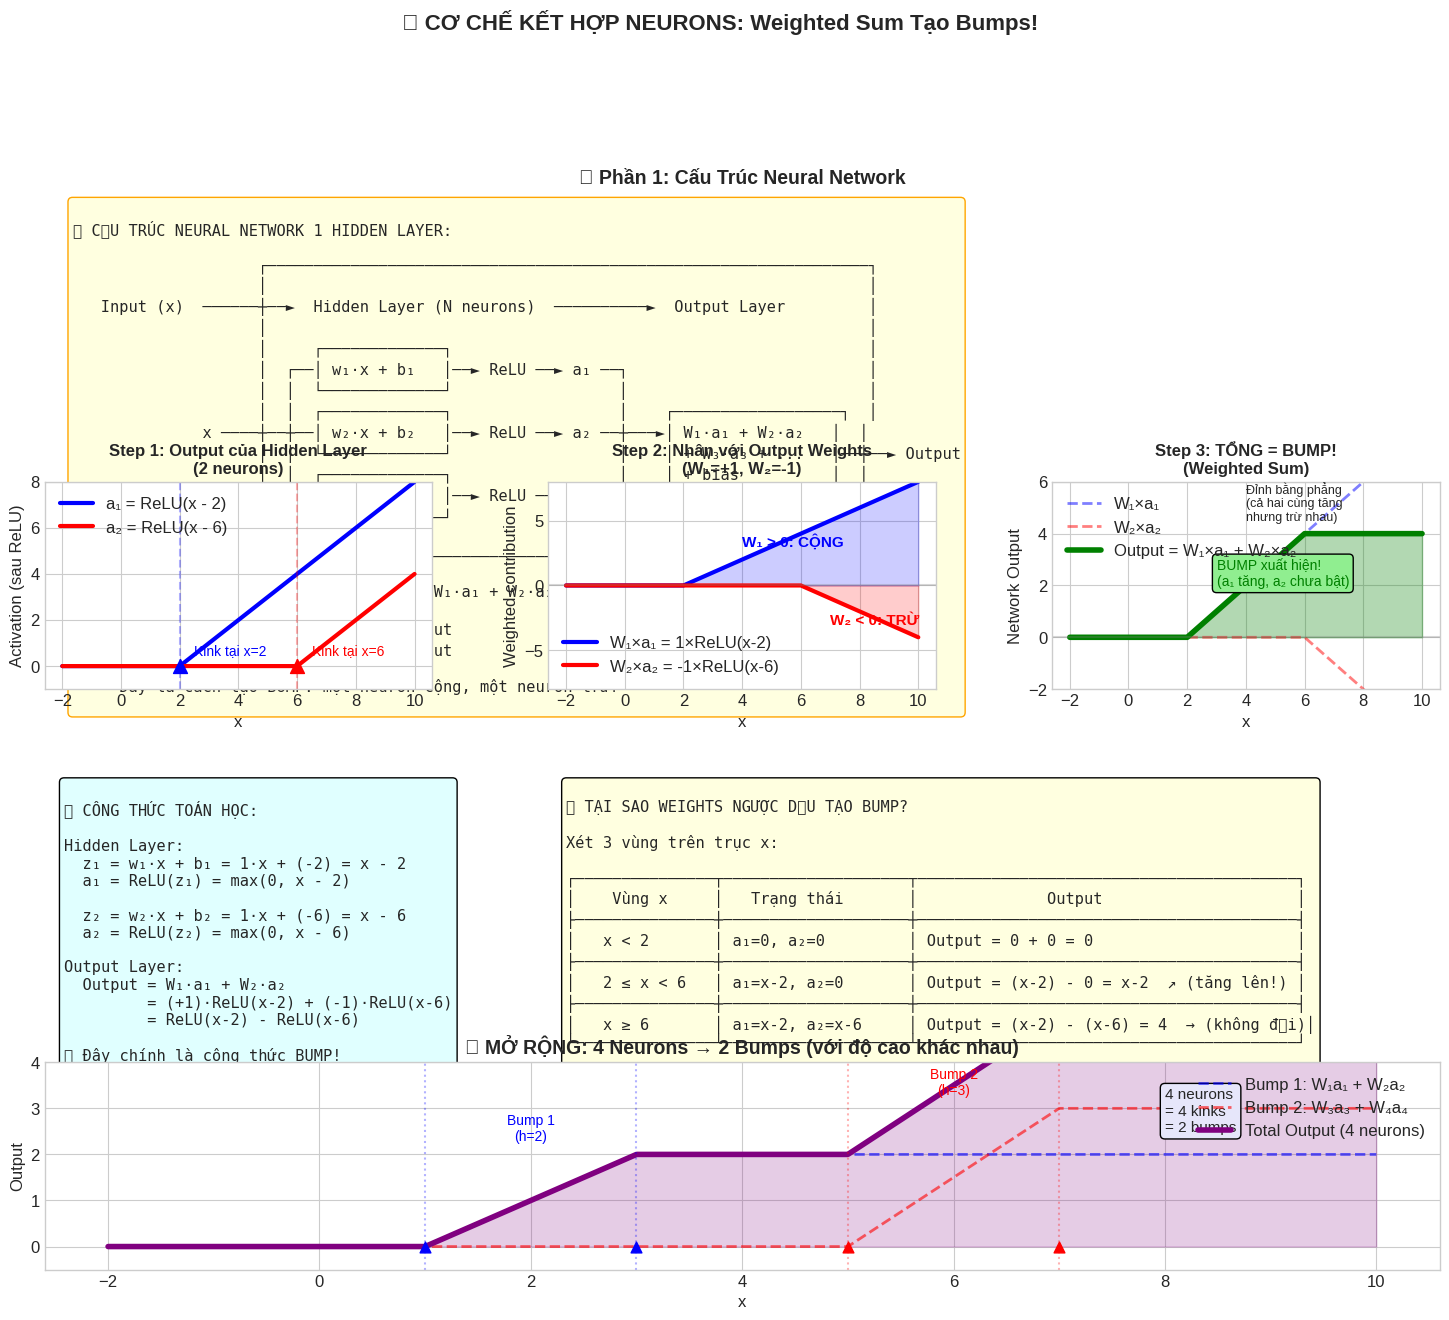


🎯 TÓM TẮT CƠ CHẾ KẾT HỢP:

   1️⃣  Mỗi hidden neuron tạo ra MỘT đường gấp khúc (ReLU)

   2️⃣  Output layer thực hiện WEIGHTED SUM của tất cả hidden neurons:
       Output = W₁·a₁ + W₂·a₂ + W₃·a₃ + ... + bias

   3️⃣  Khi weights có DẤU NGƯỢC NHAU:
       • Wᵢ > 0: neuron i CỘNG vào output
       • Wⱼ < 0: neuron j TRỪ khỏi output
       → Hai neurons TRIỆT TIÊU nhau tại một số vùng → tạo BUMP!

   4️⃣  Training (Gradient Descent) tự động tìm:
       • Weights của hidden layer (wᵢ, bᵢ) → vị trí các kinks
       • Weights của output layer (Wᵢ) → độ cao và hướng của bumps

   5️⃣  Đủ nhiều neurons → đủ nhiều bumps → xấp xỉ BẤT KỲ hàm nào!



In [26]:
# Thêm cell mới sau cell "MINH HỌA 2: Hai neuron tạo thành BUMP"

# ============================================
# MINH HỌA 2.5: CƠ CHẾ KẾT HỢP NEURONS TRONG NN
# ============================================

"""
🔑 CÂU HỎI: Làm thế nào các neurons kết hợp với nhau?

ANSWER: Thông qua WEIGHTED SUM ở output layer!

Cấu trúc 1 Hidden Layer NN:
    Input(x) 
        ↓
    [w₁, b₁] → ReLU → a₁ ──┐
    [w₂, b₂] → ReLU → a₂ ──┼── W_out × [a₁, a₂, ...] + b_out → Output
    [w₃, b₃] → ReLU → a₃ ──┘
        ...

Output = W_out[0]·a₁ + W_out[1]·a₂ + W_out[2]·a₃ + ... + b_out

Khi W_out có cả giá trị DƯƠNG và ÂM → các neurons CỘNG/TRỪ nhau!
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-2, 10, 1000)

fig = plt.figure(figsize=(18, 14))
gs = GridSpec(4, 3, figure=fig, hspace=0.4, wspace=0.3)

# ============================================
# PHẦN 1: Cấu trúc của Neural Network
# ============================================
ax_structure = fig.add_subplot(gs[0, :])
ax_structure.axis('off')

structure_text = """
🧠 CẤU TRÚC NEURAL NETWORK 1 HIDDEN LAYER:

                    ┌─────────────────────────────────────────────────────────────────┐
                    │                                                                 │
   Input (x)  ──────┼──►  Hidden Layer (N neurons)  ──────────►  Output Layer         │
                    │                                                                 │
                    │     ┌─────────────┐                                             │
                    │  ┌──│ w₁·x + b₁   │──► ReLU ──► a₁ ──┐                          │
                    │  │  └─────────────┘                  │                          │
                    │  │  ┌─────────────┐                  │    ┌──────────────────┐  │
              x ────┼──┼──│ w₂·x + b₂   │──► ReLU ──► a₂ ──┼───►│ W₁·a₁ + W₂·a₂   │  │
                    │  │  └─────────────┘                  │    │ + W₃·a₃ + ...   │──┼──► Output
                    │  │  ┌─────────────┐                  │    │ + bias          │  │
                    │  └──│ w₃·x + b₃   │──► ReLU ──► a₃ ──┘    └──────────────────┘  │
                    │     └─────────────┘                                             │
                    │           ...                                                   │
                    └─────────────────────────────────────────────────────────────────┘
                    
🔑 ĐIỂM MẤU CHỐT: Output = Σ(Wᵢ × aᵢ) = W₁·a₁ + W₂·a₂ + W₃·a₃ + ...
                  
   • Nếu W₁ > 0: neuron 1 CỘNG vào output
   • Nếu W₂ < 0: neuron 2 TRỪ khỏi output
   
   → Đây là cách tạo BUMP: một neuron cộng, một neuron trừ!
"""

ax_structure.text(0.02, 0.95, structure_text, transform=ax_structure.transAxes,
                  fontsize=11, verticalalignment='top', fontfamily='monospace',
                  bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))
ax_structure.set_title("📐 Phần 1: Cấu Trúc Neural Network", fontsize=14, fontweight='bold')

# ============================================
# PHẦN 2: Ví dụ cụ thể với 2 neurons
# ============================================

# Neuron 1: ReLU(x - 2), weight vào hidden = 1, bias = -2
# Neuron 2: ReLU(x - 6), weight vào hidden = 1, bias = -6

# Hidden layer weights và biases
w1_hidden, b1_hidden = 1, -2  # Neuron 1: bật tại x = 2
w2_hidden, b2_hidden = 1, -6  # Neuron 2: bật tại x = 6

# Output layer weights
W_out_1 = 1   # Weight của neuron 1 → output (DƯƠNG)
W_out_2 = -1  # Weight của neuron 2 → output (ÂM)

# Tính output của từng neuron
a1 = relu(w1_hidden * x + b1_hidden)  # Neuron 1 output
a2 = relu(w2_hidden * x + b2_hidden)  # Neuron 2 output

# Tính contribution của từng neuron
contribution_1 = W_out_1 * a1  # +1 × ReLU(x-2)
contribution_2 = W_out_2 * a2  # -1 × ReLU(x-6)

# Tổng output
output = contribution_1 + contribution_2

# Plot 1: Hai neurons riêng lẻ
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(x, a1, 'b-', linewidth=3, label='a₁ = ReLU(x - 2)')
ax1.plot(x, a2, 'r-', linewidth=3, label='a₂ = ReLU(x - 6)')
ax1.axvline(x=2, color='blue', linestyle='--', alpha=0.3)
ax1.axvline(x=6, color='red', linestyle='--', alpha=0.3)
ax1.scatter([2], [0], color='blue', s=100, zorder=5, marker='^')
ax1.scatter([6], [0], color='red', s=100, zorder=5, marker='^')
ax1.set_title("Step 1: Output của Hidden Layer\n(2 neurons)", fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('Activation (sau ReLU)')
ax1.legend()
ax1.set_ylim(-1, 8)
ax1.annotate('Kink tại x=2', xy=(2.5, 0.5), fontsize=10, color='blue')
ax1.annotate('Kink tại x=6', xy=(6.5, 0.5), fontsize=10, color='red')

# Plot 2: Weights của output layer
ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(x, contribution_1, 'b-', linewidth=3, label=f'W₁×a₁ = {W_out_1}×ReLU(x-2)')
ax2.plot(x, contribution_2, 'r-', linewidth=3, label=f'W₂×a₂ = {W_out_2}×ReLU(x-6)')
ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax2.fill_between(x, 0, contribution_1, alpha=0.2, color='blue')
ax2.fill_between(x, 0, contribution_2, alpha=0.2, color='red')
ax2.set_title("Step 2: Nhân với Output Weights\n(W₁=+1, W₂=-1)", fontsize=12, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('Weighted contribution')
ax2.legend()
ax2.set_ylim(-8, 8)
ax2.annotate('W₁ > 0: CỘNG', xy=(4, 3), fontsize=11, color='blue', fontweight='bold')
ax2.annotate('W₂ < 0: TRỪ', xy=(7, -3), fontsize=11, color='red', fontweight='bold')

# Plot 3: Tổng = Bump!
ax3 = fig.add_subplot(gs[1, 2])
ax3.plot(x, contribution_1, 'b--', linewidth=2, alpha=0.5, label='W₁×a₁')
ax3.plot(x, contribution_2, 'r--', linewidth=2, alpha=0.5, label='W₂×a₂')
ax3.plot(x, output, 'green', linewidth=4, label='Output = W₁×a₁ + W₂×a₂')
ax3.fill_between(x, 0, output, where=(output > 0), alpha=0.3, color='green')
ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax3.set_title("Step 3: TỔNG = BUMP!\n(Weighted Sum)", fontsize=12, fontweight='bold')
ax3.set_xlabel('x')
ax3.set_ylabel('Network Output')
ax3.legend()
ax3.set_ylim(-2, 6)
ax3.annotate('BUMP xuất hiện!\n(a₁ tăng, a₂ chưa bật)', xy=(3, 2), fontsize=10, color='green',
             bbox=dict(boxstyle='round', facecolor='lightgreen'))
ax3.annotate('Đỉnh bằng phẳng\n(cả hai cùng tăng\nnhưng trừ nhau)', xy=(4, 4.5), fontsize=9)

# ============================================
# PHẦN 3: Công thức toán học chi tiết
# ============================================
ax_math = fig.add_subplot(gs[2, 0])
ax_math.axis('off')

math_text = """
📐 CÔNG THỨC TOÁN HỌC:

Hidden Layer:
  z₁ = w₁·x + b₁ = 1·x + (-2) = x - 2
  a₁ = ReLU(z₁) = max(0, x - 2)
  
  z₂ = w₂·x + b₂ = 1·x + (-6) = x - 6  
  a₂ = ReLU(z₂) = max(0, x - 6)

Output Layer:
  Output = W₁·a₁ + W₂·a₂
         = (+1)·ReLU(x-2) + (-1)·ReLU(x-6)
         = ReLU(x-2) - ReLU(x-6)
         
🎯 Đây chính là công thức BUMP!
"""
ax_math.text(0.05, 0.95, math_text, transform=ax_math.transAxes,
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightcyan'))

# ============================================
# PHẦN 4: Tại sao weights ngược dấu tạo bump?
# ============================================
ax_explain = fig.add_subplot(gs[2, 1:])
ax_explain.axis('off')

explain_text = """
🔑 TẠI SAO WEIGHTS NGƯỢC DẤU TẠO BUMP?

Xét 3 vùng trên trục x:

┌───────────────┬────────────────────┬─────────────────────────────────────────┐
│    Vùng x     │   Trạng thái       │              Output                     │
├───────────────┼────────────────────┼─────────────────────────────────────────┤
│   x < 2       │ a₁=0, a₂=0         │ Output = 0 + 0 = 0                      │
├───────────────┼────────────────────┼─────────────────────────────────────────┤
│   2 ≤ x < 6   │ a₁=x-2, a₂=0       │ Output = (x-2) - 0 = x-2  ↗ (tăng lên!) │
├───────────────┼────────────────────┼─────────────────────────────────────────┤
│   x ≥ 6       │ a₁=x-2, a₂=x-6     │ Output = (x-2) - (x-6) = 4  → (không đổi)│
└───────────────┴────────────────────┴─────────────────────────────────────────┘

📌 INSIGHT:
• Vùng 1 (x<2): Cả hai neuron "tắt" (output = 0)
• Vùng 2 (2≤x<6): Neuron 1 "bật", neuron 2 "tắt" → output tăng lên!
• Vùng 3 (x≥6): Cả hai "bật" và TRIỆT TIÊU nhau → output = hằng số!

➡️ Kết quả: Hình thang (trapezoid) với đỉnh bằng phẳng!
"""
ax_explain.text(0.02, 0.95, explain_text, transform=ax_explain.transAxes,
                fontsize=11, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightyellow'))

# ============================================
# PHẦN 5: Mở rộng với nhiều neurons hơn
# ============================================
ax5 = fig.add_subplot(gs[3, :])

# 4 neurons để tạo 2 bumps
# Bump 1: neurons 1,2 (x=1 đến x=3)
# Bump 2: neurons 3,4 (x=5 đến x=7)

# Hidden layer
a1 = relu(x - 1)  # Bật tại x=1
a2 = relu(x - 3)  # Bật tại x=3
a3 = relu(x - 5)  # Bật tại x=5
a4 = relu(x - 7)  # Bật tại x=7

# Output weights: tạo 2 bumps với độ cao khác nhau
W1, W2, W3, W4 = 1, -1, 1.5, -1.5  # Bump 1 height=2, Bump 2 height=3

bump1 = W1*a1 + W2*a2  # = ReLU(x-1) - ReLU(x-3)
bump2 = W3*a3 + W4*a4  # = 1.5*ReLU(x-5) - 1.5*ReLU(x-7)
total_output = bump1 + bump2

ax5.plot(x, bump1, 'b--', linewidth=2, alpha=0.6, label='Bump 1: W₁a₁ + W₂a₂')
ax5.plot(x, bump2, 'r--', linewidth=2, alpha=0.6, label='Bump 2: W₃a₃ + W₄a₄')
ax5.plot(x, total_output, 'purple', linewidth=4, label='Total Output (4 neurons)')
ax5.fill_between(x, 0, total_output, where=(total_output > 0), alpha=0.2, color='purple')

# Đánh dấu các kinks
for kink, color in zip([1, 3, 5, 7], ['blue', 'blue', 'red', 'red']):
    ax5.axvline(x=kink, color=color, linestyle=':', alpha=0.3)
    ax5.scatter([kink], [0], color=color, s=60, zorder=5, marker='^')

ax5.set_title("🧠 MỞ RỘNG: 4 Neurons → 2 Bumps (với độ cao khác nhau)", 
              fontsize=14, fontweight='bold')
ax5.set_xlabel('x')
ax5.set_ylabel('Output')
ax5.legend(loc='upper right')
ax5.set_ylim(-0.5, 4)

# Annotate
ax5.annotate('4 neurons\n= 4 kinks\n= 2 bumps', xy=(8, 2.5), fontsize=11,
             bbox=dict(boxstyle='round', facecolor='lavender'))
ax5.annotate('Bump 1\n(h=2)', xy=(2, 2.3), fontsize=10, ha='center', color='blue')
ax5.annotate('Bump 2\n(h=3)', xy=(6, 3.3), fontsize=10, ha='center', color='red')

plt.suptitle("🔬 CƠ CHẾ KẾT HỢP NEURONS: Weighted Sum Tạo Bumps!", 
             fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("🎯 TÓM TẮT CƠ CHẾ KẾT HỢP:")
print("="*70)
print("""
   1️⃣  Mỗi hidden neuron tạo ra MỘT đường gấp khúc (ReLU)
   
   2️⃣  Output layer thực hiện WEIGHTED SUM của tất cả hidden neurons:
       Output = W₁·a₁ + W₂·a₂ + W₃·a₃ + ... + bias
   
   3️⃣  Khi weights có DẤU NGƯỢC NHAU:
       • Wᵢ > 0: neuron i CỘNG vào output
       • Wⱼ < 0: neuron j TRỪ khỏi output
       → Hai neurons TRIỆT TIÊU nhau tại một số vùng → tạo BUMP!
   
   4️⃣  Training (Gradient Descent) tự động tìm:
       • Weights của hidden layer (wᵢ, bᵢ) → vị trí các kinks
       • Weights của output layer (Wᵢ) → độ cao và hướng của bumps
       
   5️⃣  Đủ nhiều neurons → đủ nhiều bumps → xấp xỉ BẤT KỲ hàm nào!
""")
print("="*70)